In [316]:
# C:\Users\yebel\Desktop\OPENCLASSROOMS\FORMATION_DATA_ANALYST\OPENCLASSROOMS_COURS\PROJET9\DAN-P9-data\DAN-P9-data
# PROJET9_DATA_ANALYSIS_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_ANALYST//OPENCLASSROOMS_COURS//PROJET9//DAN-P9-data//DAN-P9-data')

In [317]:
# IMPORTATION DES FONCTIONS.

import pandas as pd
import numpy as np
import pylab
%pylab inline
from TableauImg import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines #légende
%matplotlib inline
#import matplotlib.patches as mpatches
#ce module est rajouté uniquement pour la présentation de slides
from sklearn import preprocessing, decomposition, metrics
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from functools import reduce
from scipy.stats import norm
from scipy import stats
from scipy.stats import ks_2samp
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from IPython.display import display #affichage des tableaux

from functions import *

Populating the interactive namespace from numpy and matplotlib


C:\Users\yebel\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'norm', 'std', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [318]:
# 0- RESUME DU SCRIPT.

# Ce script est gracieusement fourni par OCR et comporte des fonctions d'affichage de:

# éboulis des valeurs propres, projection sur les plans factoriels, 

# cercle des corrélations, et dendrogramme.

# L'année que nous étudions ici est 2019, car c'est la dernière année pour laquelle nous possédons

# des chiffres pour toutes les données.

# La donnée DeltaPop% (CROISSANCE MOYENNE ANNUELLE DE LA POP) est calculée sur la période 2010-2019

# Nous étudions 158 pays.

In [319]:
# I-LECTURE ET PREPARATION DES DONNEES.

#I-1 CREATION DE LA TABLE POPULATION.

pop = pd.read_csv('FAOSTAT_Pop1019.csv')

In [320]:
# Selection les variables utilisées pour le travail.

pop = pop[['Area', 'Year', 'Value']]

# Définissons la population en Millions d'habitants.

pop['Value'] = pop['Value']*1000

In [321]:
# Fonction pivot_table nous donne le TCD des variables agrégées du fichier population.

pop1 = pop.pivot_table(index='Area', columns='Year', values='Value')

# Renommer la colonne value par population.

pop1 = pop1.rename(columns={"Value":"Population"})

# Visualisation des données de la population.

pop1

Year,2010,2019
Area,,
Afghanistan,29186000.0,38042000.0
Albania,2948000.0,2881000.0
Algeria,35977000.0,43053000.0
Angola,23356000.0,31825000.0
Antigua and Barbuda,88000.0,97000.0
...,...,...
Venezuela (Bolivarian Republic of),28440000.0,28516000.0
Viet Nam,87968000.0,96462000.0
Yemen,23155000.0,29162000.0


In [322]:
# Vérification des valeurs nulles ou manquantes.

pop1.isnull().sum()

Year
2010    1
2019    0
dtype: int64

In [323]:
# Affichage des valeurs manquantes de la colonne 2010.

pop1['NaN 2010'] = pd.isnull(pop1[2010]) 

pop1[pop1['NaN 2010'] == True]

Year,2010,2019,NaN 2010
Area,,,
Burundi,NaN,11530580.0,True


In [324]:
# Affectation manuelle des valeurs manquantes: voir le fichier Population_2000_2018.

pop1.loc['Burundi', 2010] = 8675603

In [325]:
# Vérification des valeurs nulles ou manquantes.

pop1.isnull().sum()

Year
2010        0
2019        0
NaN 2010    0
dtype: int64

In [326]:
# Calcul du taux de croissance moyen annuel de la population entre 2010 et 2019.

gr_Pop1019 = (pop1[2019]/pop1[2010])**(1/(10-1))*100 - 100

# Arrondir à deux chiffres après la virgule.

pop1['gr_Pop1019'] = round(gr_Pop1019,2)

pop1

Year,2010,2019,NaN 2010,gr_Pop1019
Area,,,,
Afghanistan,29186000.0,38042000.0,False,2.99
Albania,2948000.0,2881000.0,False,-0.26
Algeria,35977000.0,43053000.0,False,2.02
Angola,23356000.0,31825000.0,False,3.50
Antigua and Barbuda,88000.0,97000.0,False,1.09
...,...,...,...,...
Venezuela (Bolivarian Republic of),28440000.0,28516000.0,False,0.03
Viet Nam,87968000.0,96462000.0,False,1.03
Yemen,23155000.0,29162000.0,False,2.60


In [327]:
# Suppression des colonnes superflues.

pop1.drop(columns=['NaN 2010'], inplace=True)

# Suppression des colonnes superflues.

pop1.drop(columns=[2010], inplace=True)

# Index du fichier pop1.

pop1.reset_index(inplace=True)

# Renommer la colonne Area par Pays.

pop1 = pop1.rename(columns={"Area":"Pays"})

pop1

Year,Pays,2019,gr_Pop1019
0,Afghanistan,38042000.0,2.99
1,Albania,2881000.0,-0.26
2,Algeria,43053000.0,2.02
3,Angola,31825000.0,3.50
4,Antigua and Barbuda,97000.0,1.09
...,...,...,...
174,Venezuela (Bolivarian Republic of),28516000.0,0.03
175,Viet Nam,96462000.0,1.03
176,Yemen,29162000.0,2.60
177,Zambia,17861000.0,3.07


In [328]:
# Renommer la population de l'année 2019.

pop1['pop2019'] = pop1.iloc[:,1]

# Index du fichier pop1.

pop1.reset_index(inplace=True)

# Renommer la colonne Area par Pays.

pop1 = pop1.rename(columns={"Area":"Pays"})

pop1

Year,index,Pays,2019,gr_Pop1019,pop2019
0,0,Afghanistan,38042000.0,2.99,38042000.0
1,1,Albania,2881000.0,-0.26,2881000.0
2,2,Algeria,43053000.0,2.02,43053000.0
3,3,Angola,31825000.0,3.50,31825000.0
4,4,Antigua and Barbuda,97000.0,1.09,97000.0
...,...,...,...,...,...
174,174,Venezuela (Bolivarian Republic of),28516000.0,0.03,28516000.0
175,175,Viet Nam,96462000.0,1.03,96462000.0
176,176,Yemen,29162000.0,2.60,29162000.0
177,177,Zambia,17861000.0,3.07,17861000.0


In [329]:
# Retenons et réorganisons des colonnes utiles du fichier pop1.

pop1 = pop1[['Pays','pop2019', 'gr_Pop1019']]

# Visualisation du fichier pop1.

pop1

Year,Pays,pop2019,gr_Pop1019
0,Afghanistan,38042000.0,2.99
1,Albania,2881000.0,-0.26
2,Algeria,43053000.0,2.02
3,Angola,31825000.0,3.50
4,Antigua and Barbuda,97000.0,1.09
...,...,...,...
174,Venezuela (Bolivarian Republic of),28516000.0,0.03
175,Viet Nam,96462000.0,1.03
176,Yemen,29162000.0,2.60
177,Zambia,17861000.0,3.07


In [330]:
# I-1-2 Création de la table: disponibilité totale des Protéines et du ratio proteine animale et disponibilité totale des Protéines.

ProtAniProtTot = pd.read_csv('FAOSTAT_ProtAnim_ProtTot.csv')

# Suppression des lignes 62 et 63 correspondant à la Chine du fichier FAOSTAT_ProtAnim_ProtTot.

ProtAniProtTot=ProtAniProtTot.iloc[ProtAniProtTot.index != 62]

ProtAniProtTot=ProtAniProtTot.iloc[ProtAniProtTot.index != 63]

In [331]:
# Fonction pivot_table nous donne le TCD des variables agrégées du fichier ProtAniProtTot.

ProtAniProtTot = ProtAniProtTot.pivot_table(index=['Area', 'Element'],
                                           columns='Item',
                                           values='Value')

# Index du fichier ProtAniProtTot.

ProtAniProtTot.reset_index(inplace=True)

# Renommer les colonnes du fichier ProtAniProtTot.

ProtAniProtTot.rename(columns={"Area":"Pays",
                               "Animal Products":"ProtAni",
                               "Grand Total":"DisProT"},
                     inplace=True)

In [332]:
# Retenons les colonnes à utiliser.

ProtAniProtTot = ProtAniProtTot[['Pays', 'ProtAni', 'DisProT']] 

# Calcul du ration protéine animale sur la disponibilité totale des protéines.

RaProAnDisProT = ProtAniProtTot['ProtAni'] / ProtAniProtTot['DisProT']

# Arrondir à deux chiffres après la virgule.

ProtAniProtTot['RaProAnDisProT'] = round(RaProAnDisProT,2)

# Gardons les colonnes utilisées.

ProtAniProtTot = ProtAniProtTot[['Pays','DisProT','RaProAnDisProT']]

# Visualisation du fichier ProtAniProtTot.

ProtAniProtTot

Item,Pays,DisProT,RaProAnDisProT
0,Afghanistan,57.31,0.18
1,Albania,116.02,0.54
2,Algeria,90.84,0.27
3,Angola,52.09,0.30
4,Antigua and Barbuda,80.80,0.64
...,...,...,...
174,Venezuela (Bolivarian Republic of),51.55,0.44
175,Viet Nam,88.21,0.39
176,Yemen,53.33,0.21
177,Zambia,60.89,0.23


In [333]:
# Vérification des valeurs nulles ou manquantes

ProtAniProtTot.isnull().sum()

Item
Pays              0
DisProT           0
RaProAnDisProT    0
dtype: int64

In [334]:
# Jointure interne des fichiers pop1 et ProtAniProtTot.

data_pop_prot = pd.merge(pop1, ProtAniProtTot, on = 'Pays', how = 'inner')

data_pop_prot

,Pays,pop2019,gr_Pop1019,DisProT,RaProAnDisProT
0,Afghanistan,38042000.0,2.99,57.31,0.18
1,Albania,2881000.0,-0.26,116.02,0.54
2,Algeria,43053000.0,2.02,90.84,0.27
3,Angola,31825000.0,3.50,52.09,0.30
4,Antigua and Barbuda,97000.0,1.09,80.80,0.64
...,...,...,...,...,...
173,Venezuela (Bolivarian Republic of),28516000.0,0.03,51.55,0.44
174,Viet Nam,96462000.0,1.03,88.21,0.39
175,Yemen,29162000.0,2.60,53.33,0.21
176,Zambia,17861000.0,3.07,60.89,0.23


In [335]:
# Vérification des valeurs nulles ou manquantes

data_pop_prot.isnull().sum()

Pays              0
pop2019           0
gr_Pop1019        0
DisProT           0
RaProAnDisProT    0
dtype: int64

In [336]:
# Statistiques descriptives.

data_pop_prot.describe()

,pop2019,gr_Pop1019,DisProT,RaProAnDisProT
count,1.780000e+02,178.000000,178.000000,178.000000
mean,4.284649e+07,1.318764,81.606798,0.428315
std,1.528953e+08,1.242517,20.859980,0.160671
min,5.300000e+04,-2.460000,25.910000,0.060000
25%,2.790250e+06,0.442500,65.542500,0.290000
50%,9.758265e+06,1.180000,81.155000,0.445000
75%,3.147325e+07,2.167500,96.317500,0.560000
max,1.433784e+09,5.620000,143.940000,0.750000


In [337]:
# I-1-3 Création de la table de la  disponibilité alimentaires totales en Protéines et Calories.

DispoKcal = pd.read_csv('FAOSTAT_KcalDispoAlim.csv')

# Suppression de la ligne 31 correspondant à la Chine du fichier FAOSTAT_KcalDispoAlim.

DispoKcal=DispoKcal.iloc[DispoKcal.index != 31]

In [338]:
# Fonction pivot_table nous donne le TCD des variables agrégées du fichier DispoKcal.

DispoKcal = DispoKcal.pivot_table(index=['Area','Element'],
                                           columns='Item',
                                           values='Value')

# Index du fichier DispoKcal.

DispoKcal.reset_index(inplace=True)

# Renommer les colonnes du fichier DispoKcal.

DispoKcal.rename(columns={"Area":"Pays",
                          "Grand Total":"DispoAlim"},
                     inplace=True)

In [339]:
# Gardons les colonnes utilisées.

DispoKcal = DispoKcal[['Pays', 'DispoAlim']]

# Visualisation du fichier DispoKcal.

DispoKcal

Item,Pays,DispoAlim
0,Afghanistan,2273
1,Albania,3338
2,Algeria,3493
3,Angola,2445
4,Antigua and Barbuda,2485
...,...,...
174,Venezuela (Bolivarian Republic of),2204
175,Viet Nam,2939
176,Yemen,2019
177,Zambia,2267


In [340]:
# Vérification des valeurs nulles ou manquantes.

DispoKcal.isnull().sum()

Item
Pays         0
DispoAlim    0
dtype: int64

In [341]:
# Jointure interne des fichiers data_pop_prot et DispoKcal.left

data_pop_prot_dispokc = pd.merge(data_pop_prot, DispoKcal, on='Pays', how = 'inner')

data_pop_prot_dispokc

,Pays,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim
0,Afghanistan,38042000.0,2.99,57.31,0.18,2273
1,Albania,2881000.0,-0.26,116.02,0.54,3338
2,Algeria,43053000.0,2.02,90.84,0.27,3493
3,Angola,31825000.0,3.50,52.09,0.30,2445
4,Antigua and Barbuda,97000.0,1.09,80.80,0.64,2485
...,...,...,...,...,...,...
173,Venezuela (Bolivarian Republic of),28516000.0,0.03,51.55,0.44,2204
174,Viet Nam,96462000.0,1.03,88.21,0.39,2939
175,Yemen,29162000.0,2.60,53.33,0.21,2019
176,Zambia,17861000.0,3.07,60.89,0.23,2267


In [342]:
# Vérification des valeurs nulles ou manquantes.

data_pop_prot_dispokc.isnull().sum()

Pays              0
pop2019           0
gr_Pop1019        0
DisProT           0
RaProAnDisProT    0
DispoAlim         0
dtype: int64

In [343]:
# Statistiques descriptives du fichier data_pop_prot_dispokc.

data_pop_prot_dispokc.describe()

,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim
count,1.780000e+02,178.000000,178.000000,178.000000,178.000000
mean,4.284649e+07,1.318764,81.606798,0.428315,2882.707865
std,1.528953e+08,1.242517,20.859980,0.160671,457.443676
min,5.300000e+04,-2.460000,25.910000,0.060000,1707.000000
25%,2.790250e+06,0.442500,65.542500,0.290000,2572.750000
50%,9.758265e+06,1.180000,81.155000,0.445000,2879.500000
75%,3.147325e+07,2.167500,96.317500,0.560000,3277.750000
max,1.433784e+09,5.620000,143.940000,0.750000,3862.000000


In [344]:
# I-1-4 Création de la table des importations totales des poulets.

import_poulet = pd.read_csv('FAOSTAT_POULETS_IMPORT19.csv')

# Supprimer les pays non utilisés;

import_poulets = import_poulet.drop(import_poulet.index[[11,18,23,34,42,57,58,62,118,126,131,139,155,159,161,173,178]])

import_poulets

,Domain,Area,Element,Item,Year,Value
0,Crops and livestock products,Afghanistan,Import Quantity,"Meat, chicken",2019,42875.0
1,Crops and livestock products,Albania,Import Quantity,"Meat, chicken",2019,19304.0
2,Crops and livestock products,Algeria,Import Quantity,"Meat, chicken",2019,0.0
3,Crops and livestock products,Angola,Import Quantity,"Meat, chicken",2019,253769.0
4,Crops and livestock products,Antigua and Barbuda,Import Quantity,"Meat, chicken",2019,6010.0
...,...,...,...,...,...,...
188,Crops and livestock products,Venezuela (Bolivarian Republic of),Import Quantity,"Meat, chicken",2019,NaN
189,Crops and livestock products,Viet Nam,Import Quantity,"Meat, chicken",2019,204611.0
190,Crops and livestock products,Yemen,Import Quantity,"Meat, chicken",2019,139437.0
191,Crops and livestock products,Zambia,Import Quantity,"Meat, chicken",2019,22926.0


In [345]:
# Fonction pivot_table nous donne le TCD des variables agrégées du fichier import_poulets.

import_poulets = import_poulets.pivot_table(index=['Area'],
                                           columns='Element',
                                           values='Value')

# Index du fichier import_poulets.

import_poulets.reset_index(inplace=True)

# Renommer les colonnes du fichier import_poulets.

import_poulets.rename(columns={"Area":"Pays",
                              "Import Quantity":"Poulimport"},
                     inplace=True)

# Visualisation du fichier import_poulets.

import_poulets

Element,Pays,Poulimport
0,Afghanistan,42875.0
1,Albania,19304.0
2,Algeria,0.0
3,Angola,253769.0
4,Antigua and Barbuda,6010.0
...,...,...
169,Vanuatu,3693.0
170,Viet Nam,204611.0
171,Yemen,139437.0
172,Zambia,22926.0


In [346]:
# Vérification des valeurs nulles ou manquantes

import_poulets.isnull().sum()

Element
Pays          0
Poulimport    0
dtype: int64

In [347]:
# Jointure interne des fichiers data_pop_prot_dispokc et import_poulets_df.right

data1_df = pd.merge(data_pop_prot_dispokc, import_poulets, on='Pays', how = 'inner')

# Visualisation du fichier data1_df.

data1_df

,Pays,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport
0,Afghanistan,38042000.0,2.99,57.31,0.18,2273,42875.0
1,Albania,2881000.0,-0.26,116.02,0.54,3338,19304.0
2,Algeria,43053000.0,2.02,90.84,0.27,3493,0.0
3,Angola,31825000.0,3.50,52.09,0.30,2445,253769.0
4,Antigua and Barbuda,97000.0,1.09,80.80,0.64,2485,6010.0
...,...,...,...,...,...,...,...
168,Vanuatu,300000.0,2.70,64.49,0.41,2605,3693.0
169,Viet Nam,96462000.0,1.03,88.21,0.39,2939,204611.0
170,Yemen,29162000.0,2.60,53.33,0.21,2019,139437.0
171,Zambia,17861000.0,3.07,60.89,0.23,2267,22926.0


In [348]:
# Vérification des valeurs nulles ou manquantes

data1_df.isnull().sum()

Pays              0
pop2019           0
gr_Pop1019        0
DisProT           0
RaProAnDisProT    0
DispoAlim         0
Poulimport        0
dtype: int64

In [349]:
# Statistiques descriptives du fichier data_pop_prot_dispokc.

data1_df.describe()

,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport
count,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,4.357371e+07,1.314046,81.916532,0.428266,2890.838150,72502.150289
std,1.550332e+08,1.251410,20.482928,0.161380,451.436953,150685.297142
min,5.300000e+04,-2.460000,25.910000,0.060000,1707.000000,0.000000
25%,2.495000e+06,0.430000,65.870000,0.290000,2581.000000,2964.000000
50%,9.746000e+06,1.140000,82.240000,0.450000,2883.000000,15160.000000
75%,3.195000e+07,2.170000,96.450000,0.560000,3286.000000,58164.000000
max,1.433784e+09,5.620000,143.940000,0.750000,3862.000000,970362.000000


In [350]:
# I-1-5 Création de la table de la production totale des poulets.

prod_poulet = pd.read_csv('FAOSTAT_POULETS_PROD19.csv')

# Supprimer les pays non utilisés;

prod_poulets = prod_poulet.drop(import_poulet.index[[11,18,23,34,42,57,58,103,119,127,132,141,147,157,161,163,176,181]])

# Visualisation du fichier prod_poulets.

prod_poulets

,Domain,Area,Element,Item,Year,Value
0,Crops and livestock products,Afghanistan,Production,"Meat, chicken",2019,28033
1,Crops and livestock products,Albania,Production,"Meat, chicken",2019,11633
2,Crops and livestock products,Algeria,Production,"Meat, chicken",2019,260222
3,Crops and livestock products,Angola,Production,"Meat, chicken",2019,49002
4,Crops and livestock products,Antigua and Barbuda,Production,"Meat, chicken",2019,16
...,...,...,...,...,...,...
191,Crops and livestock products,Venezuela (Bolivarian Republic of),Production,"Meat, chicken",2019,428154
192,Crops and livestock products,Viet Nam,Production,"Meat, chicken",2019,990379
193,Crops and livestock products,Yemen,Production,"Meat, chicken",2019,190347
194,Crops and livestock products,Zambia,Production,"Meat, chicken",2019,50709


In [351]:
# Pivot_table du fichier prod_poulets.

prod_poulets_df = prod_poulets.pivot_table(index=['Area'],
                                           columns='Element',
                                           values='Value')

# Index du fichier prod_poulets_df.

prod_poulets_df.reset_index(inplace=True)

# Renommer les colonnes: Area et Production du fichier prod_poulets_df.

prod_poulets_df.rename(columns={"Area":"Pays",
                              "Production":"Poulprod"},
                     inplace=True)

# Visualisation du fichier prod_poulets_df.

prod_poulets_df

Element,Pays,Poulprod
0,Afghanistan,28033
1,Albania,11633
2,Algeria,260222
3,Angola,49002
4,Antigua and Barbuda,16
...,...,...
173,Venezuela (Bolivarian Republic of),428154
174,Viet Nam,990379
175,Yemen,190347
176,Zambia,50709


In [352]:
# Vérification des valeurs nulles ou manquantes

prod_poulets_df.isnull().sum()

Element
Pays        0
Poulprod    0
dtype: int64

In [353]:
# Jointure interne des fichiers data1_dfs et prod_poulets.

data2_df = pd.merge(data1_df, prod_poulets_df, on ='Pays', how ='inner')

# Visualisation du fichier data2_df.

data2_df

,Pays,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod
0,Afghanistan,38042000.0,2.99,57.31,0.18,2273,42875.0,28033
1,Albania,2881000.0,-0.26,116.02,0.54,3338,19304.0,11633
2,Algeria,43053000.0,2.02,90.84,0.27,3493,0.0,260222
3,Angola,31825000.0,3.50,52.09,0.30,2445,253769.0,49002
4,Antigua and Barbuda,97000.0,1.09,80.80,0.64,2485,6010.0,16
...,...,...,...,...,...,...,...,...
164,Vanuatu,300000.0,2.70,64.49,0.41,2605,3693.0,710
165,Viet Nam,96462000.0,1.03,88.21,0.39,2939,204611.0,990379
166,Yemen,29162000.0,2.60,53.33,0.21,2019,139437.0,190347
167,Zambia,17861000.0,3.07,60.89,0.23,2267,22926.0,50709


In [354]:
# Vérification des valeurs nulles ou manquantes

data2_df.isnull().sum()

Pays              0
pop2019           0
gr_Pop1019        0
DisProT           0
RaProAnDisProT    0
DispoAlim         0
Poulimport        0
Poulprod          0
dtype: int64

In [355]:
# Statistiques descriptives du fichier data_pop_prot_dispokc.

data2_df.describe()

,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod
count,1.690000e+02,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,4.459218e+07,1.292367,81.925266,0.426331,2893.792899,74054.473373,6.916460e+05
std,1.567240e+08,1.243576,20.566373,0.160430,450.470731,152123.275395,2.264208e+06
min,7.200000e+04,-2.460000,25.910000,0.060000,1707.000000,0.000000,1.600000e+01
25%,2.948000e+06,0.400000,65.580000,0.290000,2583.000000,2834.000000,1.119200e+04
50%,1.003600e+07,1.140000,82.590000,0.440000,2888.000000,17323.000000,6.848800e+04
75%,3.251000e+07,2.170000,96.450000,0.560000,3286.000000,60508.000000,2.960100e+05
max,1.433784e+09,5.620000,143.940000,0.750000,3862.000000,970362.000000,2.017285e+07


In [356]:
# I-1-6 Création de la table du pib par habitant.

pibh = pd.read_csv('FAOSTAT_PIBH19.csv')

# Supprimer les pays non utilisés;

pibh = pibh.drop(pibh.index[[11,19,24,35,54,116,128,137,153,157,169,174]])

# Visualisation du fichier pibh.

pibh

,Domain,Area,Element,Item,Year,Value
0,Suite of Food Security Indicators,Afghanistan,Value,"Gross domestic product per capita, PPP, dissem...",2019,2065.0
1,Suite of Food Security Indicators,Albania,Value,"Gross domestic product per capita, PPP, dissem...",2019,13671.5
2,Suite of Food Security Indicators,Algeria,Value,"Gross domestic product per capita, PPP, dissem...",2019,11510.6
3,Suite of Food Security Indicators,Angola,Value,"Gross domestic product per capita, PPP, dissem...",2019,6670.3
4,Suite of Food Security Indicators,Antigua and Barbuda,Value,"Gross domestic product per capita, PPP, dissem...",2019,21548.7
...,...,...,...,...,...,...
182,Suite of Food Security Indicators,Uzbekistan,Value,"Gross domestic product per capita, PPP, dissem...",2019,7014.3
183,Suite of Food Security Indicators,Vanuatu,Value,"Gross domestic product per capita, PPP, dissem...",2019,3117.7
184,Suite of Food Security Indicators,Viet Nam,Value,"Gross domestic product per capita, PPP, dissem...",2019,8041.2
185,Suite of Food Security Indicators,Zambia,Value,"Gross domestic product per capita, PPP, dissem...",2019,3470.4


In [357]:
# Pivot_table du fichier pibh_df.

pibh_df = pibh.pivot_table(index=['Area'],
                              columns='Item',
                              values='Value')

# Index du fichier pibh_df.

pibh_df.reset_index(inplace=True)

# Renommer les colonnes: Area et GDP per capita du fichier pibh_df.

pibh_df.rename(columns={"Area":"Pays",
                     "Gross domestic product per capita, PPP, dissemination (constant 2011 international $)":"PIBH"},
                     inplace=True)

# VIsualisation du fichier pibh_df.

pibh_df

Item,Pays,PIBH
0,Afghanistan,2065.0
1,Albania,13671.5
2,Algeria,11510.6
3,Angola,6670.3
4,Antigua and Barbuda,21548.7
...,...,...
170,Uzbekistan,7014.3
171,Vanuatu,3117.7
172,Viet Nam,8041.2
173,Zambia,3470.4


In [358]:
# Vérification des valeurs nulles ou manquantes

pibh_df.isnull().sum()

Item
Pays    0
PIBH    0
dtype: int64

In [359]:
# Jointure interne des fichiers data1_dfs et prod_poulets.

data3_df = pd.merge(data2_df, pibh_df, on ='Pays', how ='inner')

# Visualisation du fichier data3_df.

data3_df

,Pays,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH
0,Afghanistan,38042000.0,2.99,57.31,0.18,2273,42875.0,28033,2065.0
1,Albania,2881000.0,-0.26,116.02,0.54,3338,19304.0,11633,13671.5
2,Algeria,43053000.0,2.02,90.84,0.27,3493,0.0,260222,11510.6
3,Angola,31825000.0,3.50,52.09,0.30,2445,253769.0,49002,6670.3
4,Antigua and Barbuda,97000.0,1.09,80.80,0.64,2485,6010.0,16,21548.7
...,...,...,...,...,...,...,...,...,...
156,Uzbekistan,32982000.0,1.63,100.37,0.43,3219,19716.0,64313,7014.3
157,Vanuatu,300000.0,2.70,64.49,0.41,2605,3693.0,710,3117.7
158,Viet Nam,96462000.0,1.03,88.21,0.39,2939,204611.0,990379,8041.2
159,Zambia,17861000.0,3.07,60.89,0.23,2267,22926.0,50709,3470.4


In [360]:
# Vérification des valeurs nulles ou manquantes

data3_df.isnull().sum()

Pays              0
pop2019           0
gr_Pop1019        0
DisProT           0
RaProAnDisProT    0
DispoAlim         0
Poulimport        0
Poulprod          0
PIBH              0
dtype: int64

In [361]:
# Statistiques descriptives du fichier: pibh.

data3_df.describe()

,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH
count,1.610000e+02,161.000000,161.000000,161.000000,161.000000,161.000000,1.610000e+02,161.000000
mean,3.723433e+07,1.336149,82.020000,0.427329,2898.881988,68695.993789,6.280778e+05,20149.326087
std,1.167555e+08,1.223404,20.716172,0.160401,448.787232,143613.549846,2.031482e+06,20144.367711
min,7.200000e+04,-1.340000,25.910000,0.060000,1707.000000,0.000000,1.600000e+01,751.700000
25%,2.948000e+06,0.430000,65.580000,0.290000,2583.000000,2818.000000,1.119200e+04,4690.500000
50%,9.746000e+06,1.170000,82.240000,0.450000,2888.000000,17323.000000,6.848800e+04,13082.200000
75%,3.298200e+07,2.210000,97.160000,0.560000,3286.000000,55701.000000,2.960100e+05,29723.200000
max,1.366418e+09,5.620000,143.940000,0.750000,3862.000000,970362.000000,2.017285e+07,127162.000000


In [362]:
# I-1-7 Création de la table de l'indice de stabilité.

stab_pol = pd.read_csv('FAOSTAT_STAB_POL.csv')

# Supprimer les pays non utilisés;

stab_pol = stab_pol.drop(stab_pol.index[[13,21,26,58,59,122,134,143,159,163,165,177,182]])

stab_pol

,Domain,Area,Element,Item,Year,Value
0,Suite of Food Security Indicators,Afghanistan,Value,Political stability and absence of violence/te...,2019,-2.65
1,Suite of Food Security Indicators,Albania,Value,Political stability and absence of violence/te...,2019,0.12
2,Suite of Food Security Indicators,Algeria,Value,Political stability and absence of violence/te...,2019,-1.00
3,Suite of Food Security Indicators,American Samoa,Value,Political stability and absence of violence/te...,2019,1.16
4,Suite of Food Security Indicators,Andorra,Value,Political stability and absence of violence/te...,2019,1.62
...,...,...,...,...,...,...
192,Suite of Food Security Indicators,Venezuela (Bolivarian Republic of),Value,Political stability and absence of violence/te...,2019,-1.45
193,Suite of Food Security Indicators,Viet Nam,Value,Political stability and absence of violence/te...,2019,0.13
194,Suite of Food Security Indicators,Yemen,Value,Political stability and absence of violence/te...,2019,-2.77
195,Suite of Food Security Indicators,Zambia,Value,Political stability and absence of violence/te...,2019,-0.10


In [363]:
# Pivot_table du fichier stab_pol_df.

stab_pol_df = stab_pol.pivot_table(index=['Area'],
                              columns='Item',
                              values='Value')

# Index du fichier stab_pol_df.

stab_pol_df.reset_index(inplace=True)

# Renommer les colonnes: Area et stabilité politique & absence de violence/terrorisme du fichier stab_pol_df.

stab_pol_df.rename(columns={"Area":"Pays",
                     "Political stability and absence of violence/terrorism (index)":"STABPOL_INDEX"},
                     inplace=True)

# Visualisation du fichier stab_pol_df.

stab_pol_df

Item,Pays,STABPOL_INDEX
0,Afghanistan,-2.65
1,Albania,0.12
2,Algeria,-1.00
3,American Samoa,1.16
4,Andorra,1.62
...,...,...
179,Venezuela (Bolivarian Republic of),-1.45
180,Viet Nam,0.13
181,Yemen,-2.77
182,Zambia,-0.10


In [364]:
# Vérification des valeurs nulles ou manquantes

stab_pol_df.isnull().sum()

Item
Pays             0
STABPOL_INDEX    0
dtype: int64

In [365]:
# Jointure interne des fichiers pibh et stab_pol.

data4_df = pd.merge(data3_df, stab_pol_df, on='Pays', how = 'inner')

# DETERMINER L'INDEX DES PAYS.

data4_df = data4_df.set_index("Pays")

# Visualisation du fichier data4_df

data4_df

,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH,STABPOL_INDEX
Pays,,,,,,,,,
Afghanistan,38042000.0,2.99,57.31,0.18,2273,42875.0,28033,2065.0,-2.65
Albania,2881000.0,-0.26,116.02,0.54,3338,19304.0,11633,13671.5,0.12
Algeria,43053000.0,2.02,90.84,0.27,3493,0.0,260222,11510.6,-1.00
Angola,31825000.0,3.50,52.09,0.30,2445,253769.0,49002,6670.3,-0.31
Antigua and Barbuda,97000.0,1.09,80.80,0.64,2485,6010.0,16,21548.7,0.96
...,...,...,...,...,...,...,...,...,...
Uzbekistan,32982000.0,1.63,100.37,0.43,3219,19716.0,64313,7014.3,-0.27
Vanuatu,300000.0,2.70,64.49,0.41,2605,3693.0,710,3117.7,1.03
Viet Nam,96462000.0,1.03,88.21,0.39,2939,204611.0,990379,8041.2,0.13


In [366]:
# Vérification des valeurs nulles ou manquantes

data4_df.isnull().sum()

pop2019           0
gr_Pop1019        0
DisProT           0
RaProAnDisProT    0
DispoAlim         0
Poulimport        0
Poulprod          0
PIBH              0
STABPOL_INDEX     0
dtype: int64

In [367]:
# Statistiques descriptives du fichier: data4_df.

data4_df.describe(include='all')

,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH,STABPOL_INDEX
count,1.610000e+02,161.000000,161.000000,161.000000,161.000000,161.000000,1.610000e+02,161.000000,161.000000
mean,3.723433e+07,1.336149,82.020000,0.427329,2898.881988,68695.993789,6.280778e+05,20149.326087,-0.084534
std,1.167555e+08,1.223404,20.716172,0.160401,448.787232,143613.549846,2.031482e+06,20144.367711,0.912585
min,7.200000e+04,-1.340000,25.910000,0.060000,1707.000000,0.000000,1.600000e+01,751.700000,-2.650000
25%,2.948000e+06,0.430000,65.580000,0.290000,2583.000000,2818.000000,1.119200e+04,4690.500000,-0.580000
50%,9.746000e+06,1.170000,82.240000,0.450000,2888.000000,17323.000000,6.848800e+04,13082.200000,-0.080000
75%,3.298200e+07,2.210000,97.160000,0.560000,3286.000000,55701.000000,2.960100e+05,29723.200000,0.640000
max,1.366418e+09,5.620000,143.940000,0.750000,3862.000000,970362.000000,2.017285e+07,127162.000000,1.660000


In [368]:
# Exportons le fichier final datasf sous forme csv. 

#data4_df.to_csv(path_or_buf='C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_ANALYST//OPENCLASSROOMS_COURS//PROJET9//DAN-P9-data//DAN-P9-data//Exports//datasfs.csv', index=False)

data4_df.to_csv(path_or_buf='C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_ANALYST//OPENCLASSROOMS_COURS//PROJET9//DAN-P9-data//DAN-P9-data//Exports//dataof.csv', index=True)

In [369]:
# II- ANALYSE DES DONNEES.

# Selection des variables retenues pour l'analyse.

#data4f =data4_df[['gr_Pop1019','DisProT','RaProAnDisProT','DispoAlim','Pouletimport','Pouletprod','Open_Index','PIBH','STABPOL_INDEX']]

P9_data4f =data4_df[['gr_Pop1019','DisProT','RaProAnDisProT','DispoAlim','Poulimport','Poulprod','PIBH','STABPOL_INDEX']]

P9_data4f

,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH,STABPOL_INDEX
Pays,,,,,,,,
Afghanistan,2.99,57.31,0.18,2273,42875.0,28033,2065.0,-2.65
Albania,-0.26,116.02,0.54,3338,19304.0,11633,13671.5,0.12
Algeria,2.02,90.84,0.27,3493,0.0,260222,11510.6,-1.00
Angola,3.50,52.09,0.30,2445,253769.0,49002,6670.3,-0.31
Antigua and Barbuda,1.09,80.80,0.64,2485,6010.0,16,21548.7,0.96
...,...,...,...,...,...,...,...,...
Uzbekistan,1.63,100.37,0.43,3219,19716.0,64313,7014.3,-0.27
Vanuatu,2.70,64.49,0.41,2605,3693.0,710,3117.7,1.03
Viet Nam,1.03,88.21,0.39,2939,204611.0,990379,8041.2,0.13


In [370]:
# II-1 Table des valeurs minimales et maximales de chaque variable du fichier final:P9_dataf.

table_min_max=pd.DataFrame([[np.min(P9_data4f['gr_Pop1019']), np.max(P9_data4f['gr_Pop1019'])],
              [np.min(P9_data4f['DisProT']), np.max(P9_data4f['DisProT'])],
              [np.min(P9_data4f['RaProAnDisProT']), np.max(P9_data4f['RaProAnDisProT'])],
              [np.min(P9_data4f['DispoAlim']), np.max(P9_data4f['DispoAlim'])],
              [np.min(P9_data4f['Poulimport']), np.max(P9_data4f['Poulimport'])],
              [np.min(P9_data4f['Poulprod']), np.max(P9_data4f['Poulprod'])],           
              [np.min(P9_data4f['PIBH']), np.max(P9_data4f['PIBH'])],
              [np.min(P9_data4f['STABPOL_INDEX']), np.max(P9_data4f['STABPOL_INDEX'])]],
            index=P9_data4f.columns,
            columns=['min', 'max'])
display(table_min_max.style.format({'min': "{:.2f}", 'max': "{:.2f}"}))

,min,max
gr_Pop1019,-1.34,5.62
DisProT,25.91,143.94
RaProAnDisProT,0.06,0.75
DispoAlim,1707.00,3862.00
Poulimport,0.00,970362.00
Poulprod,16.00,20172854.00
PIBH,751.70,127162.00
STABPOL_INDEX,-2.65,1.66


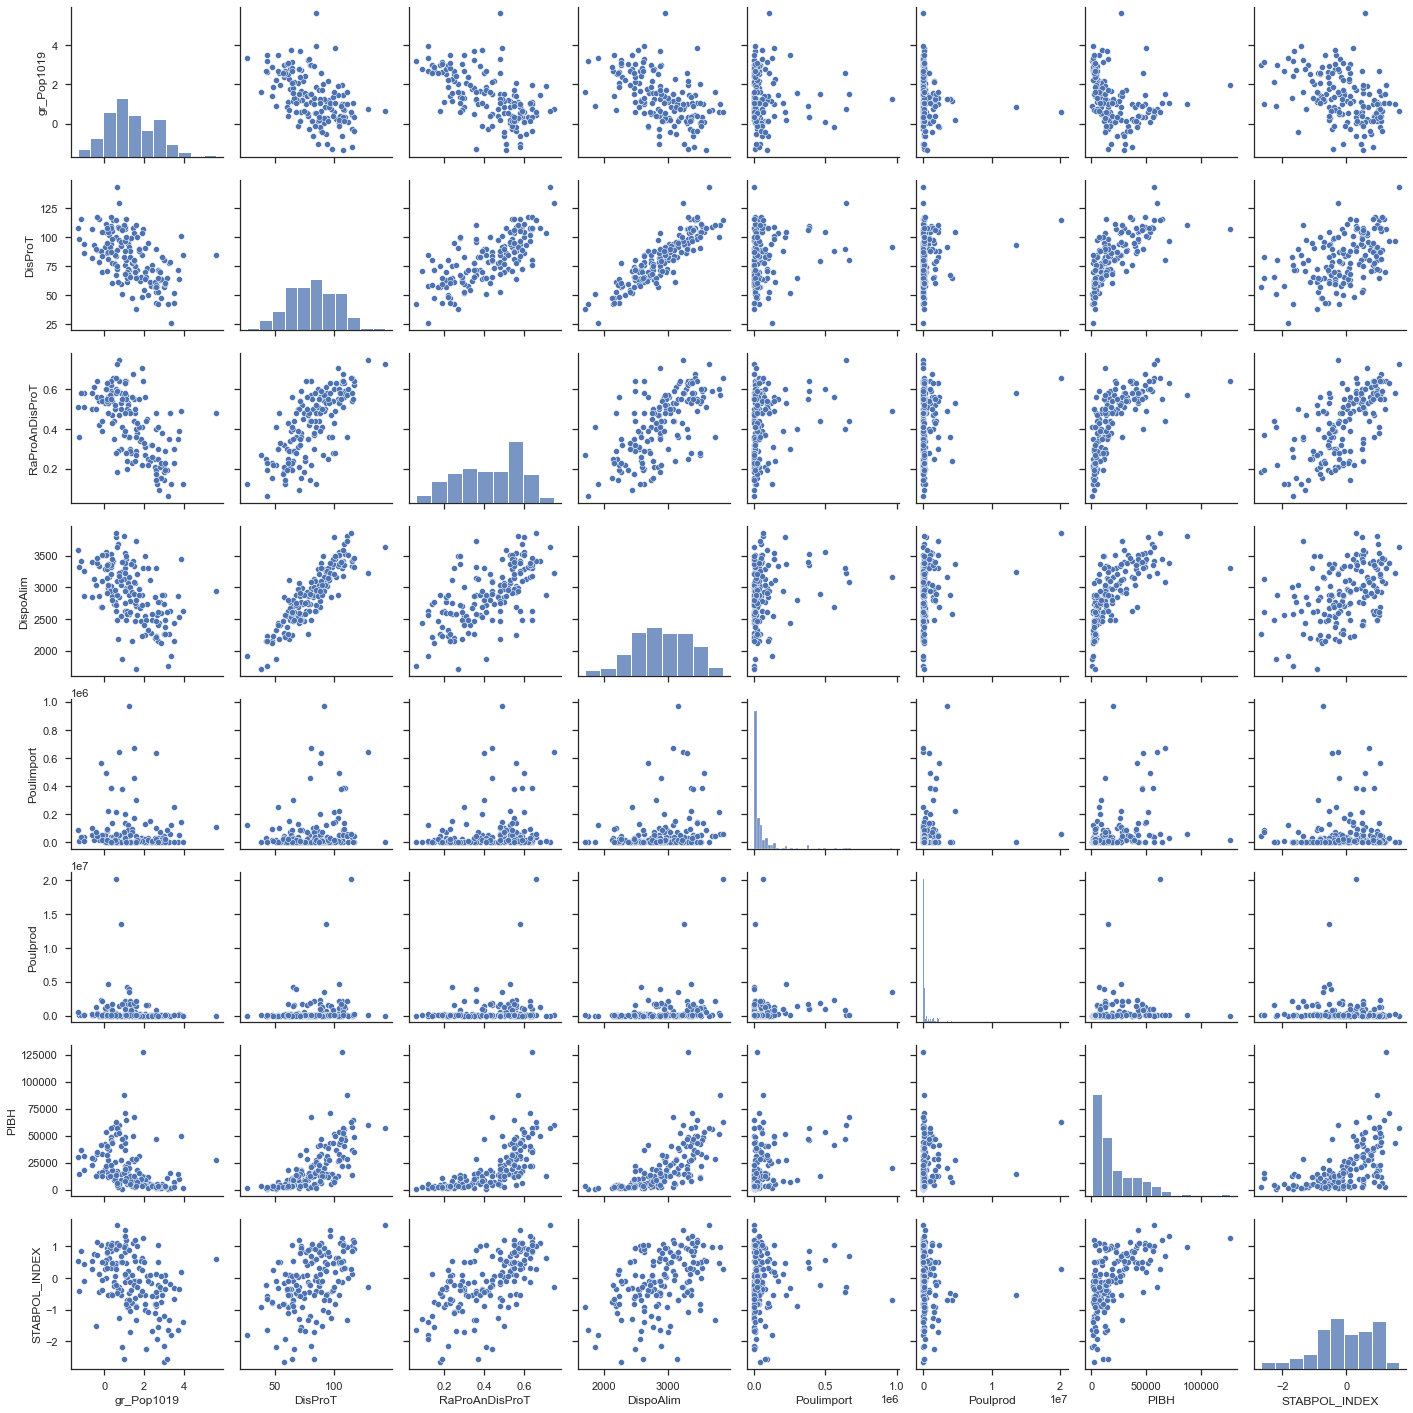

In [371]:
# II-2 Analyse des corrélations deux à deux.

# Analyse du nuage de points de chacune des variables de "P9_nuages" deux à deux dans une disposition multiple de grahiques.

P9_nuages = sns.pairplot(P9_data4f)

plt.savefig('graph/1-Scatterpoint.png')

plt.show()

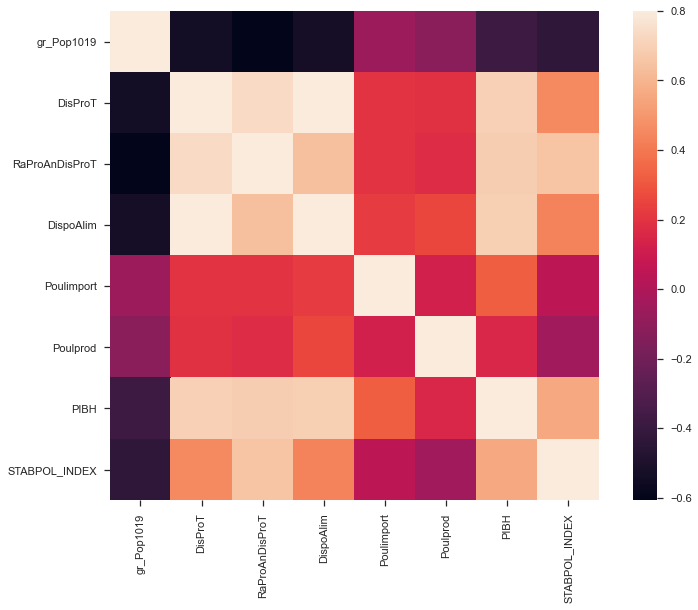

In [372]:
# II-3 Analysons maintenant la matrice colorée des corrélations du DataFrame "data5f".

P9_data_mat = P9_data4f.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(P9_data_mat, vmax=.8, square=True)
plt.savefig('graph/2-Matcorr.png')
plt.show()

In [373]:
# II-4 Clustering et Analyse en Composantes Principales.

# II-4-0 Préparation des données.

X = P9_data4f.values

# Index des Pays retenus pour l'analyse.

Pays = P9_data4f.index

# Nombre de composantes principales.

n_comp = len(P9_data4f.columns)

# Nombre d'individus (Pays) analysés.

n = P9_data4f.shape[0]

# Nombre de variables à étudier. 

p = P9_data4f.shape[1]

# Liste de variables analysées.

features = P9_data4f.columns

# Données centrées-réduites.

std_scaler = preprocessing.StandardScaler().fit(X)

X_scaled = std_scaler.transform(X)

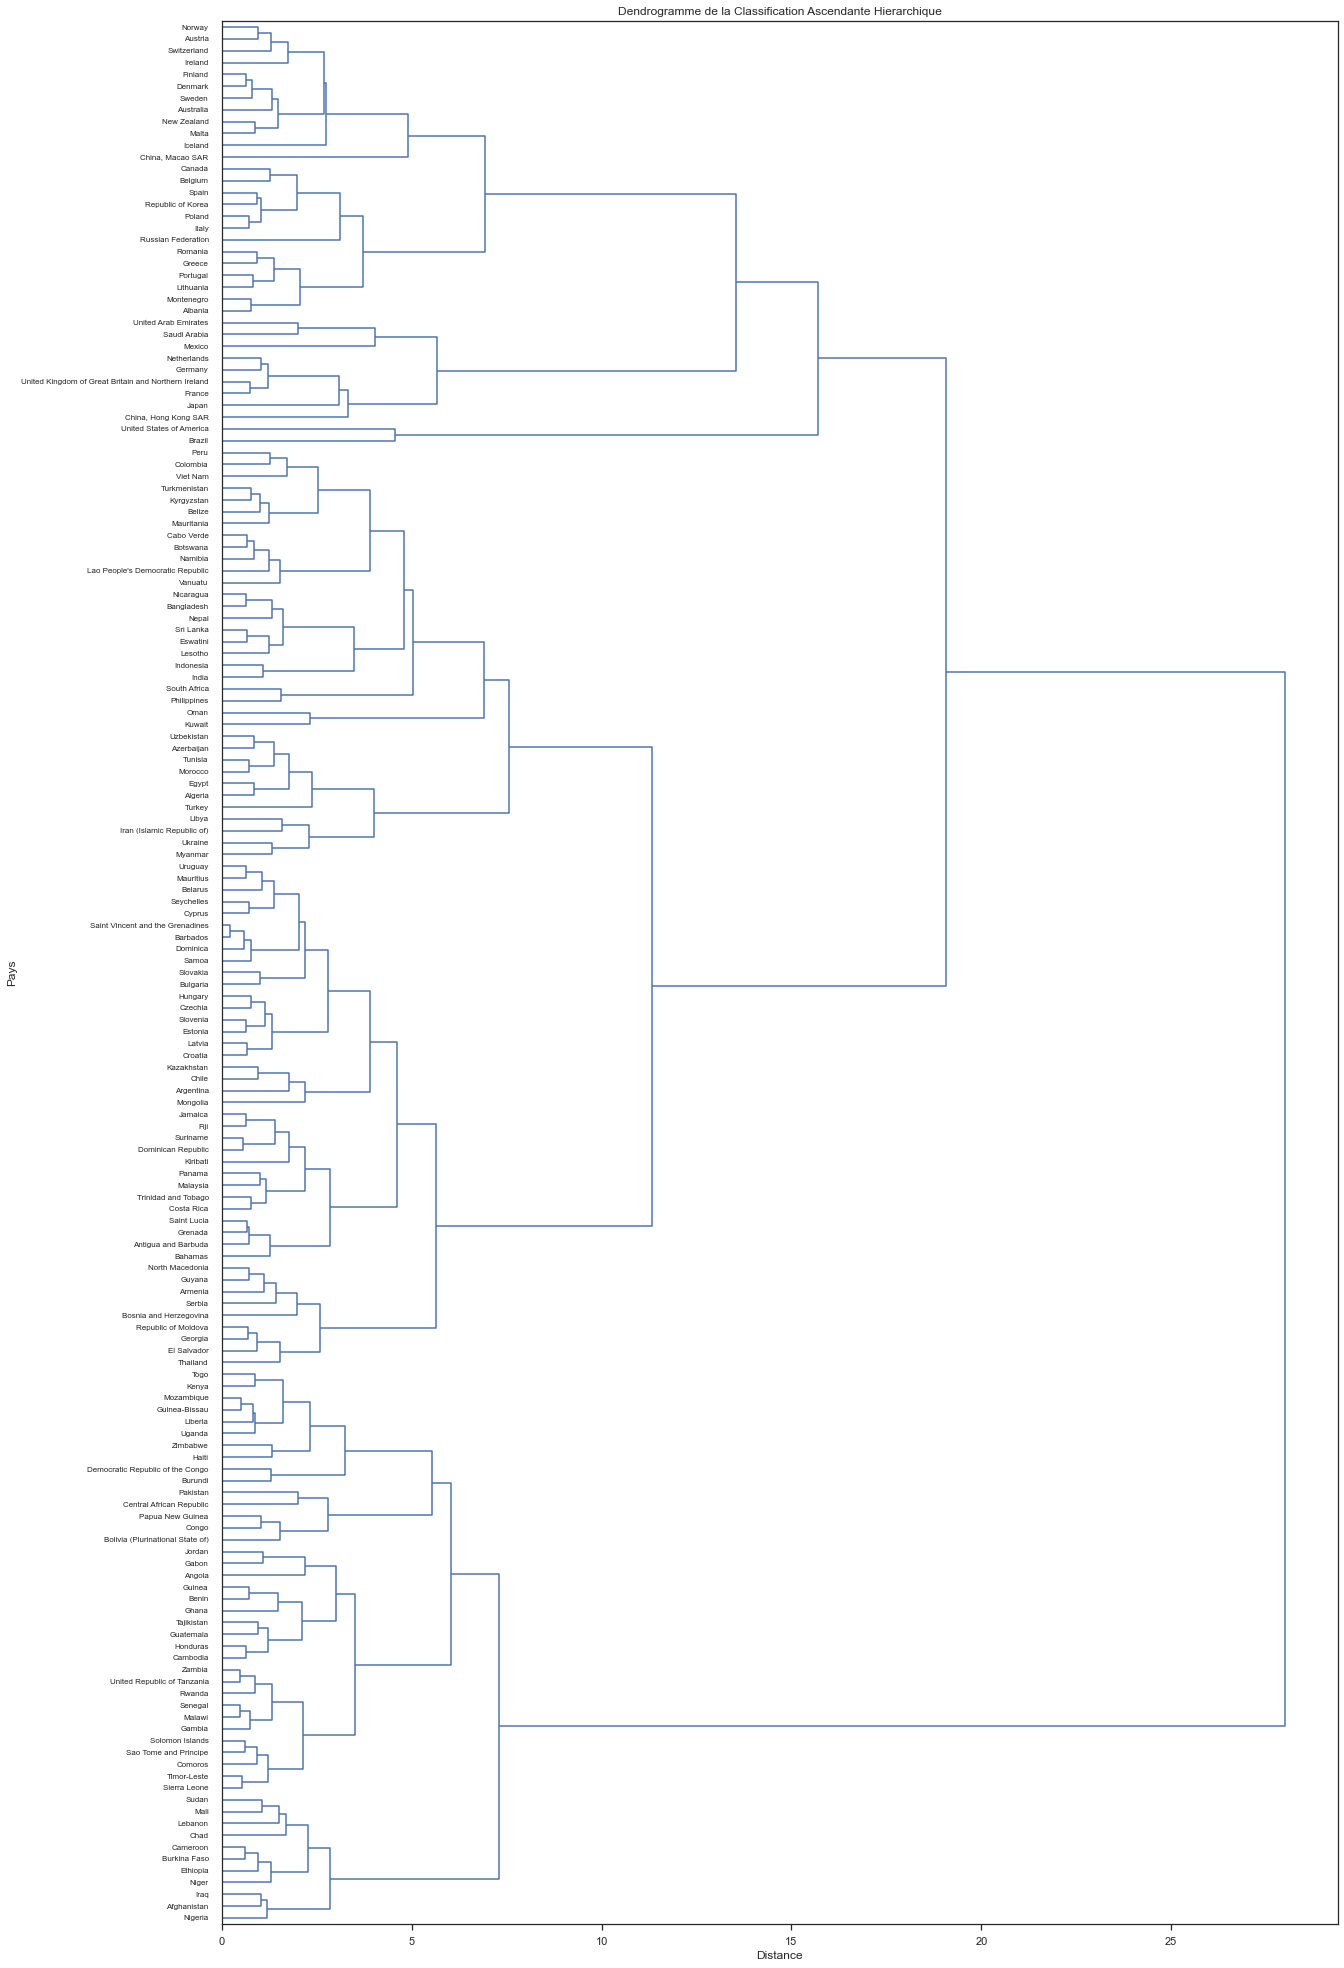

In [374]:
# II-4-1 ALGORITHME CAH (Classification Ascendante Hierarchique): Dendrogramme.

# Matrice de liaison: Méthode "Ward".

Z=linkage(X_scaled,"ward")

# Affichage du dendrogramme complet
x = 0
plt.figure(figsize=(20,35))
plt.title('Dendrogramme de la Classification Ascendante Hierarchique')
plt.xlabel('Distance')
plt.ylabel('Pays')
plt.axvline(x, c='k')
dendrogram(
    Z,
    labels = Pays,
    orientation = "right",
    color_threshold = x,
    leaf_font_size = 8
)

plt.savefig('graph/3-dend1.png')
plt.show()

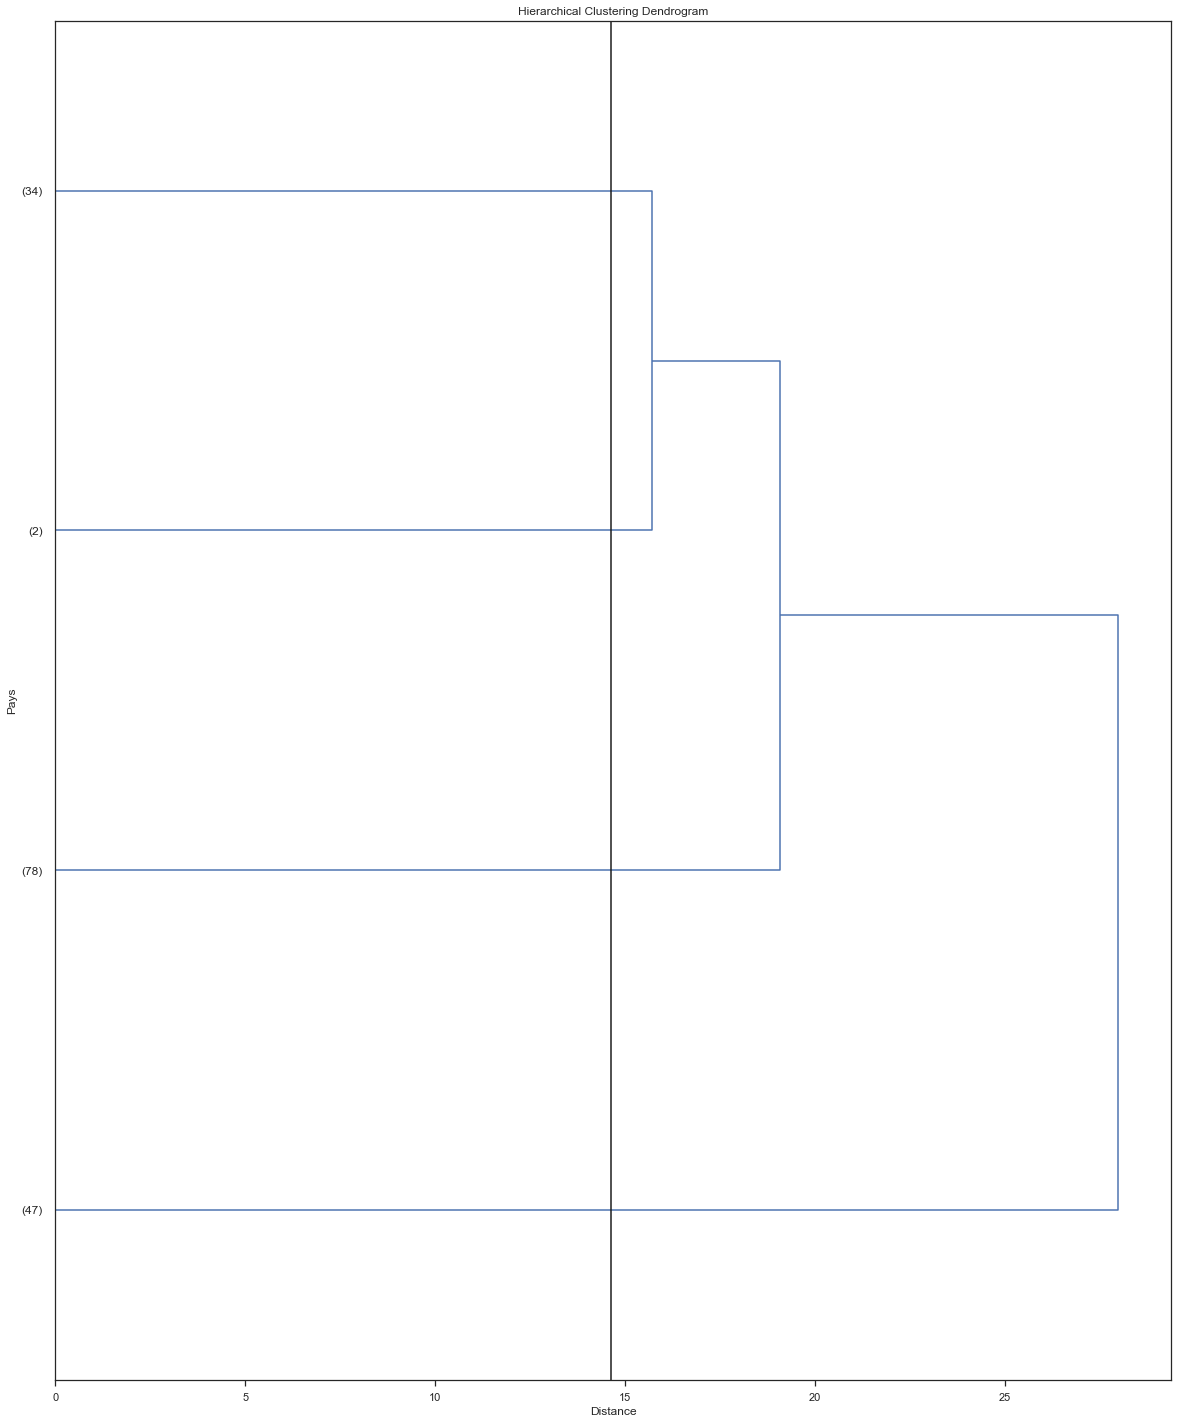

In [375]:
__CLUSTER__ = 4

# L'indice de coupure du dendrogramme.

x = Z[-__CLUSTER__][2] + (Z[-__CLUSTER__+1][2] - Z[-__CLUSTER__][2]) / 2

# Affichage du dendrogramme tronqué en 4 groupes.

plt.figure(figsize=(20,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Pays')
plt.axvline(x, c='k')
dendrogram(
    Z,
    labels = Pays,
    orientation = "right",
    color_threshold = x,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4
)

plt.savefig('graph/4-dend2.png')

plt.show()

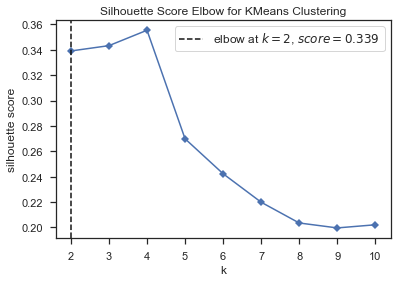

<Figure size 432x288 with 0 Axes>

In [376]:
# II-4-2 Algorithme des KMEANS.

# II-4-2-1 La méthode du coefficient de Silhouette. 

cls = KMeans(random_state=98)
visualizer = KElbowVisualizer(cls, k=(2,11), metric='silhouette', timings=False)
visualizer.fit(X_scaled) 
plt.xticks(range(2,11))
visualizer.show()
plt.savefig('graph/5-Silhouette.png')
plt.show()

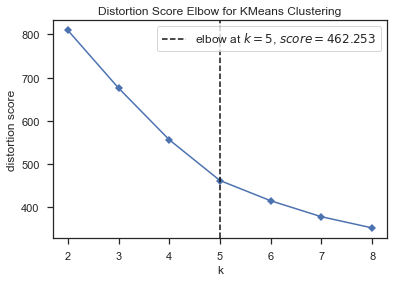

<Figure size 432x288 with 0 Axes>

In [377]:
# II-4-2-2 La Méthode du coude.

visualizer = KElbowVisualizer(cls, k=(2,9), timings=False)
visualizer.fit(X_scaled)
plt.xticks(range(2,9))
visualizer.show()
plt.savefig('graph/6-Coude.png')
plt.show()

In [378]:
# II-4-2-3 Nombre de Clusters Optimal.

# II-4-2-3-1 Application de l'algorithme du KMEANS à l'ensemble de données:n_clusters = 2.

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

# Prédiction des clusters pour chacun des éléments de données.

y_kmeans2 = kmeans.fit_predict(X_scaled)

# Visualisation des prédictions des clusters.

y_kmeans2

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1])

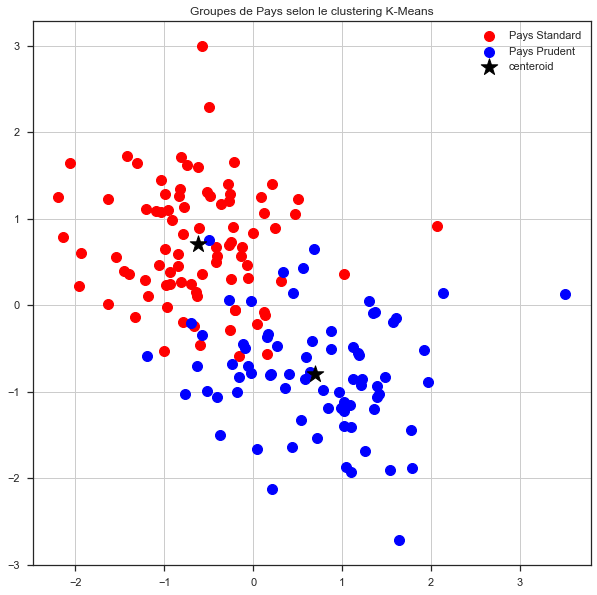

In [379]:
# II-4-2-3-2 Visualisation des résultats à travers le graphique.

# Donner une couleur et un nom uniques à chaque cluster pour une meilleure représentation .

plt.figure(figsize=(10,10)) 
plt.scatter(X_scaled[y_kmeans2 == 0, 0], X_scaled[y_kmeans2 == 0, 1], s = 100, c = 'red', label = 'Pays Standard') 
plt.scatter(X_scaled[y_kmeans2 == 1, 0], X_scaled[y_kmeans2 == 1, 1], s = 100, c = 'blue', label = 'Pays Prudent') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker='*', s = 300, c = 'black' , label = 'centeroid')
plt.title('Groupes de Pays selon le clustering K-Means') 
plt.legend()
plt.grid()
plt.savefig('graph/7-Clusters2.png')
plt.show()

In [380]:
# II-4-2-3-3 Application de l'algorithme du KMEANS à l'ensemble de données:n_clusters = 5.

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# Prédiction des clusters pour chacun des éléments de données.

y_kmeans5 = kmeans.fit_predict(X_scaled)

# Visualisation des prédictions des clusters.

y_kmeans5

array([0, 1, 3, 0, 3, 1, 3, 1, 1, 3, 3, 0, 3, 3, 1, 3, 0, 3, 3, 3, 4, 3,
       0, 0, 3, 0, 0, 1, 0, 0, 3, 2, 1, 3, 0, 0, 3, 1, 1, 1, 0, 1, 3, 3,
       3, 3, 1, 0, 0, 3, 1, 2, 0, 0, 3, 2, 0, 1, 3, 0, 0, 0, 3, 0, 0, 1,
       1, 0, 3, 3, 0, 1, 1, 3, 2, 0, 1, 0, 3, 1, 3, 3, 1, 0, 0, 0, 3, 1,
       0, 3, 0, 1, 0, 3, 2, 3, 1, 3, 0, 3, 0, 3, 2, 1, 0, 0, 0, 3, 1, 0,
       0, 3, 0, 3, 3, 1, 1, 1, 3, 1, 1, 0, 3, 3, 3, 0, 2, 0, 3, 1, 0, 3,
       1, 0, 2, 1, 3, 0, 3, 1, 1, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 2, 2, 0,
       4, 1, 3, 0, 3, 0, 0])

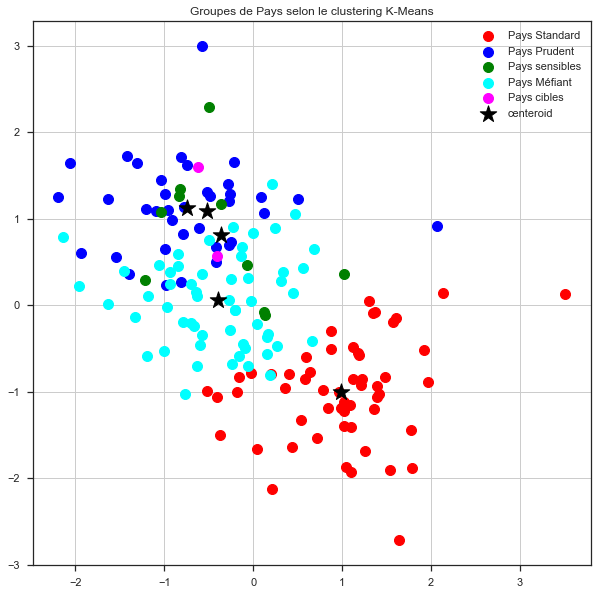

In [381]:
# II-4-2-3-4 Visualisation des résultats à travers le graphique.

# Donner une couleur et un nom uniques à chaque cluster pour une meilleure représentation .

plt.figure(figsize=(10,10)) 
plt.scatter(X_scaled[y_kmeans5 == 0, 0], X_scaled[y_kmeans5 == 0, 1], s = 100, c = 'red', label = 'Pays Standard') 
plt.scatter(X_scaled[y_kmeans5 == 1, 0], X_scaled[y_kmeans5 == 1, 1], s = 100, c = 'blue', label = 'Pays Prudent') 
plt.scatter(X_scaled[y_kmeans5 == 2, 0], X_scaled[y_kmeans5 == 2, 1], s = 100, c = 'green', label = 'Pays sensibles') 
plt.scatter(X_scaled[y_kmeans5 == 3, 0], X_scaled[y_kmeans5 == 3, 1], s = 100, c = 'cyan', label = 'Pays Méfiant') 
plt.scatter(X_scaled[y_kmeans5 == 4, 0], X_scaled[y_kmeans5 == 4, 1], s = 100, c = 'magenta', label = 'Pays cibles') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker='*', s = 300, c = 'black' , label = 'centeroid')
plt.title('Groupes de Pays selon le clustering K-Means') 
plt.legend()
plt.grid()
plt.savefig('graph/8-Clusters5.png')
plt.show()

In [382]:
# II-4-2-3-5 Application de l'algorithme du KMEANS à l'ensemble de données:n_clusters = 4

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

# Prédiction des clusters pour chacun des éléments de données.

y_kmeans4 = kmeans.fit_predict(X_scaled)

# Visualisation des prédictions des clusters.

y_kmeans4

array([1, 3, 3, 1, 3, 3, 3, 0, 0, 3, 3, 1, 3, 3, 0, 1, 1, 1, 3, 3, 2, 3,
       1, 1, 3, 1, 1, 0, 1, 1, 3, 0, 0, 3, 1, 1, 3, 3, 3, 0, 1, 0, 3, 3,
       1, 3, 0, 1, 1, 3, 0, 0, 1, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 1, 1, 3,
       0, 1, 1, 1, 1, 0, 0, 3, 0, 1, 0, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0,
       1, 3, 1, 0, 1, 3, 0, 3, 3, 3, 1, 3, 1, 1, 0, 0, 1, 1, 1, 3, 0, 1,
       1, 3, 1, 3, 1, 0, 0, 0, 3, 0, 0, 1, 3, 3, 3, 1, 0, 1, 3, 3, 1, 3,
       3, 1, 3, 0, 1, 1, 3, 0, 0, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 0, 0, 1,
       2, 3, 3, 1, 3, 1, 1])

In [383]:
# II-4-2-3-6 Application de l'algorithme du HAC à l'ensemble de données:n_clusters = 4.

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean') 

# Prédiction du cluster pour chaque point de données.

y_hc4 = hc.fit_predict(X_scaled)

y_hc4

array([1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 3, 2,
       1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       1, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1,
       3, 2, 2, 2, 2, 1, 1], dtype=int64)

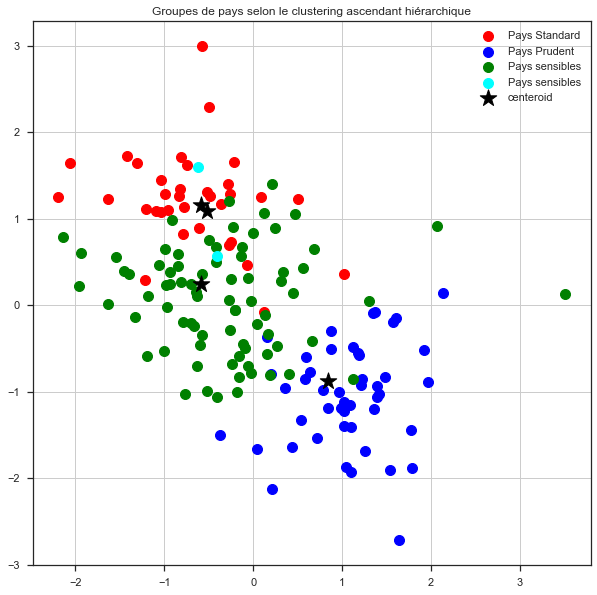

In [384]:
# II-4-2-3-7 Visualisation des résultats à travers le graphique.

# Donner une couleur et un nom uniques à chaque cluster pour une meilleure représentation .

plt.figure(figsize=(10,10)) 
plt.scatter(X_scaled[y_hc4 == 0, 0], X_scaled[y_hc4 == 0, 1], s = 100, c = 'red', label = 'Pays Standard') 
plt.scatter(X_scaled[y_hc4 == 1, 0], X_scaled[y_hc4 == 1, 1], s = 100, c = 'blue', label = 'Pays Prudent') 
plt.scatter(X_scaled[y_hc4 == 2, 0], X_scaled[y_hc4 == 2, 1], s = 100, c = 'green', label = 'Pays sensibles')
plt.scatter(X_scaled[y_hc4 == 3, 0], X_scaled[y_hc4 == 3, 1], s = 100, c = 'cyan', label = 'Pays sensibles')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker='*', s = 300, c = 'black' , label = 'centeroid')
plt.title('Groupes de pays selon le clustering ascendant hiérarchique') 
#plt.xlabel('Importations des Poulets') 
#plt.ylabel('Score de dépenses (1-100)') 
plt.legend()
plt.grid()
plt.savefig('graph/9-Cluster4.png')
plt.show()

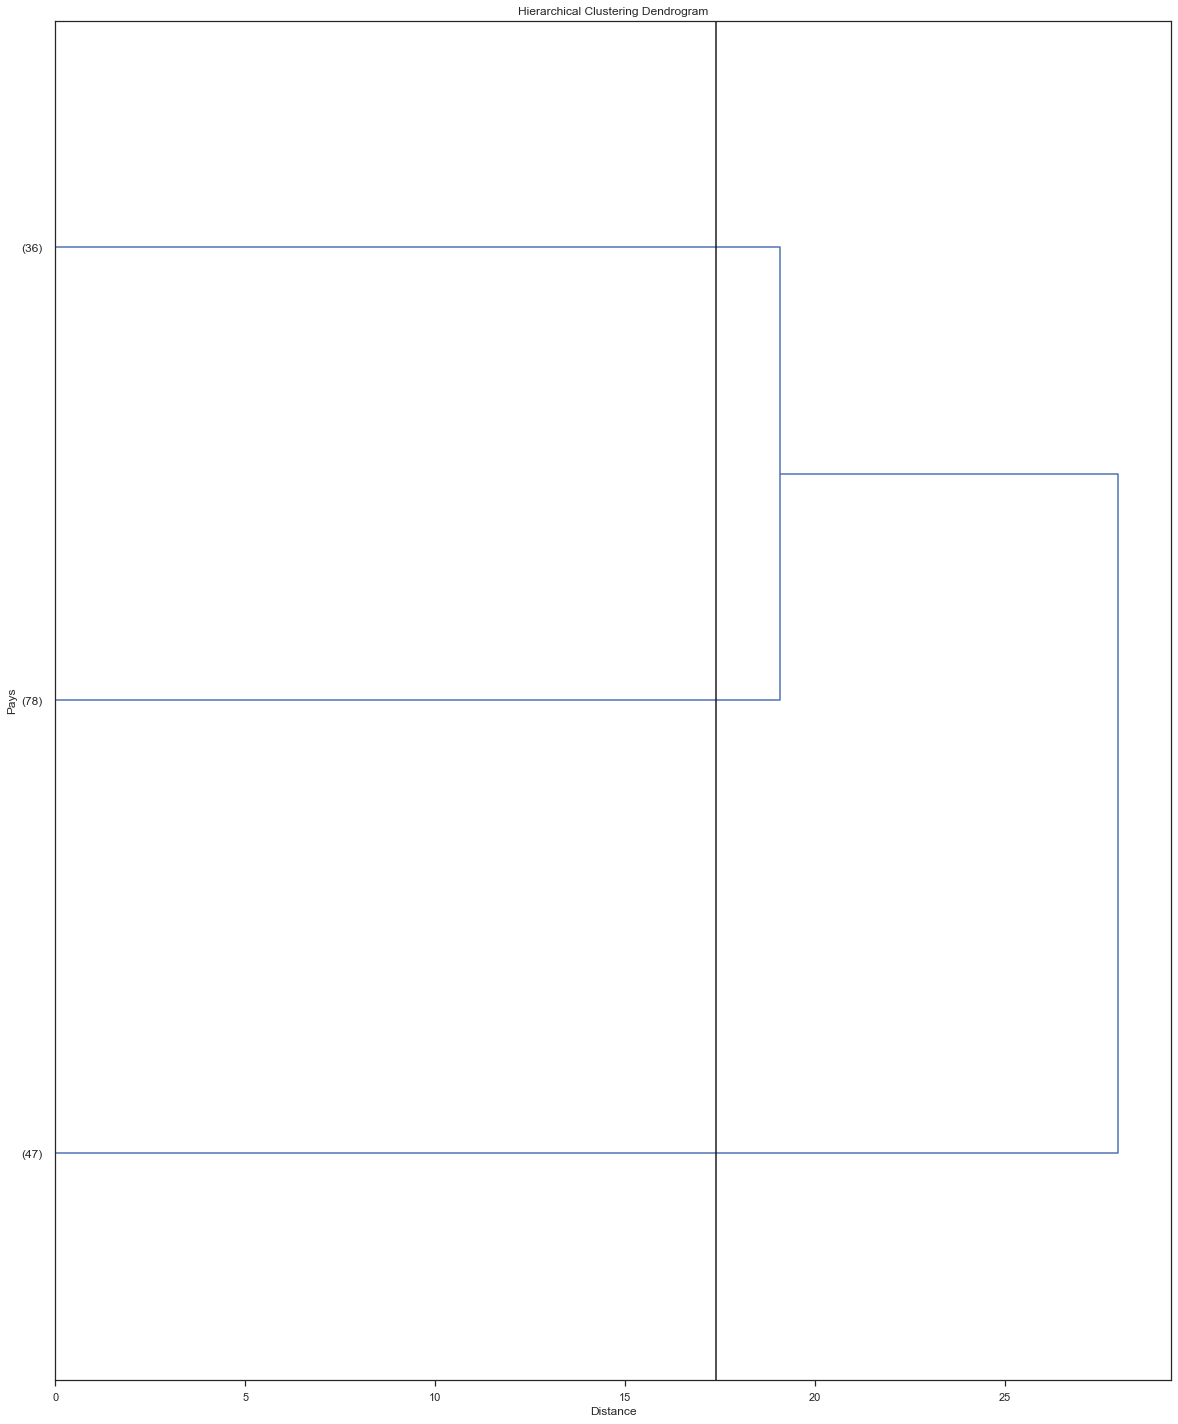

In [385]:
__CLUSTER__ = 3

# L'indice de coupure du dendrogramme.

x = Z[-__CLUSTER__][2] + (Z[-__CLUSTER__+1][2] - Z[-__CLUSTER__][2]) / 2

# Affichage du dendrogramme tronqué en 3 groupes.

plt.figure(figsize=(20,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Pays')
plt.axvline(x, c='k')
dendrogram(
    Z,
    labels = Pays,
    orientation = "right",
    color_threshold = x,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3
)

plt.savefig('graph/10-dend3.png')
plt.show()

In [386]:
# II-4-2-3-8 Application de l'algorithme du KMEANS à l'ensemble de données:n_clusters = 3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

# Prédiction des clusters pour chacun des éléments de données.

y_kmeans3 = kmeans.fit_predict(X_scaled)

# Visualisation des prédictions des clusters.

y_kmeans3

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0,
       0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       2, 0, 0, 1, 0, 1, 1])

In [387]:
# II-4-2-3-9 Application de l'algorithme du HAC à l'ensemble de données:n_clusters = 3.

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean') 

# Prédiction du cluster pour chaque point de données.

y_hc3 = hc.fit_predict(X_scaled)

y_hc3

array([1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2,
       1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       1, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1,
       0, 2, 2, 2, 2, 1, 1], dtype=int64)

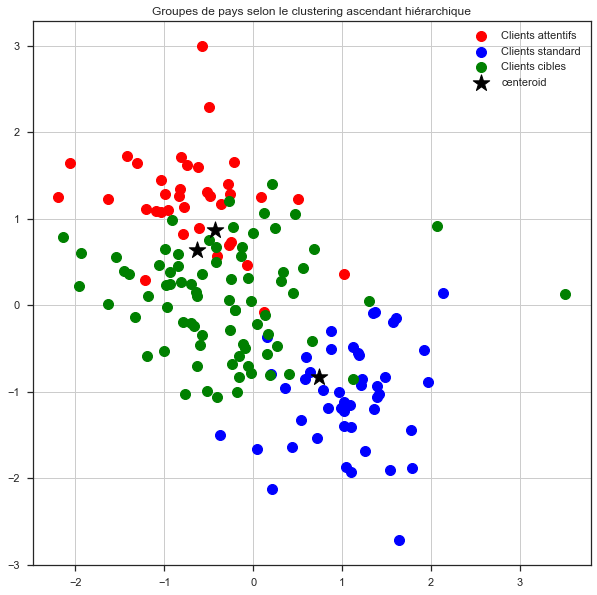

In [388]:
# II-4-2-3-10 Visualiser les clusters HAC.

plt.figure(figsize=(10,10)) 
plt.scatter(X_scaled[y_hc3 == 0, 0], X_scaled[y_hc3 == 0, 1], s = 100, c = 'red', label = 'Clients attentifs') 
plt.scatter(X_scaled[y_hc3 == 1, 0], X_scaled[y_hc3 == 1, 1], s = 100, c = 'blue', label = 'Clients standard') 
plt.scatter(X_scaled[y_hc3 == 2, 0], X_scaled[y_hc3 == 2, 1], s = 100, c = 'green', label = 'Clients cibles') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker='*', s = 300, c = 'black' , label = 'centeroid')
plt.title('Groupes de pays selon le clustering ascendant hiérarchique') 
plt.legend()
plt.grid()
plt.savefig('graph/11-Cluster3.png')
plt.show()

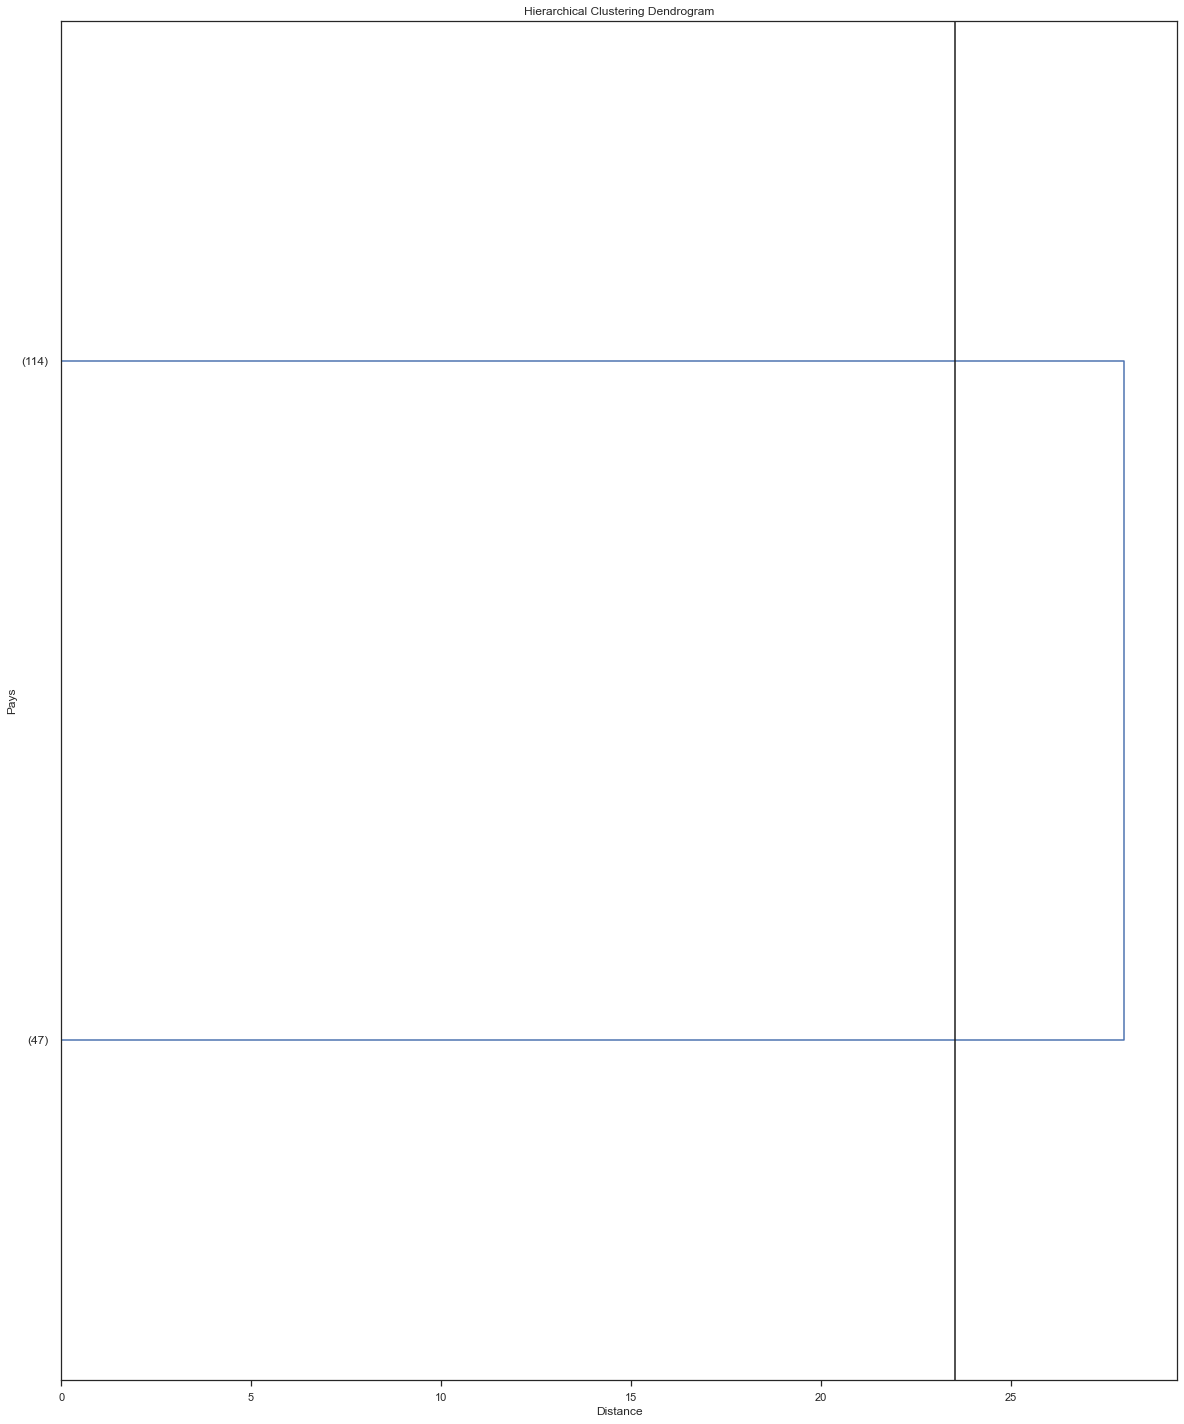

In [389]:
__CLUSTER__ = 2

# L'indice de coupure du dendrogramme.

x = Z[-__CLUSTER__][2] + (Z[-__CLUSTER__+1][2] - Z[-__CLUSTER__][2]) / 2

# Affichage du dendrogramme tronqué en 3 groupes.

plt.figure(figsize=(20,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Pays')
plt.axvline(x, c='k')
dendrogram(
    Z,
    labels = Pays,
    orientation = "right",
    color_threshold = x,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2
)

plt.savefig('graph/12-dend4.png')
plt.show()

In [390]:
# II-4-2-3-11 Application de l'algorithme du KMEANS à l'ensemble de données:n_clusters = 2.

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

# Prédiction des clusters pour chacun des éléments de données.

y_kmeans2 = kmeans.fit_predict(X_scaled)

# Visualisation des prédictions des clusters.

y_kmeans2

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1])

In [391]:
# II-4-2-3-12 Application de l'algorithme du HAC à l'ensemble de données:n_clusters = 2.

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean') 

# Prédiction du cluster pour chaque point de données.

y_hc2 = hc.fit_predict(X_scaled)

y_hc2

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1], dtype=int64)

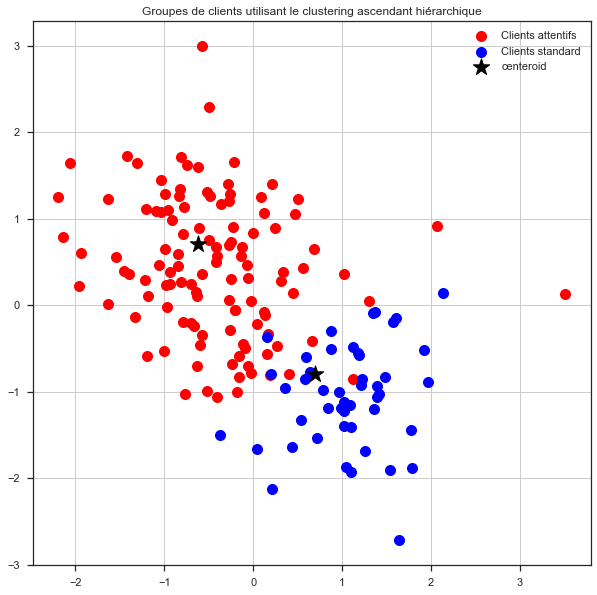

In [392]:
# II-4-2-3-13 Visualiser les clusters HAC.

plt.figure(figsize=(10,10)) 
plt.scatter(X_scaled[y_hc2 == 0, 0], X_scaled[y_hc2 == 0, 1], s = 100, c = 'red', label = 'Clients attentifs') 
plt.scatter(X_scaled[y_hc2 == 1, 0], X_scaled[y_hc2 == 1, 1], s = 100, c = 'blue', label = 'Clients standard') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker='*', s = 300, c = 'black' , label = 'centeroid')
plt.title('Groupes de clients utilisant le clustering ascendant hiérarchique') 
plt.legend()
plt.grid()
plt.savefig('graph/13-Clusters2.png')
plt.show()

In [393]:
# II-4-2-3-14 Nombre optimal clusters:3.

cluster_cah3 = fcluster(Z, 3, criterion='maxclust')

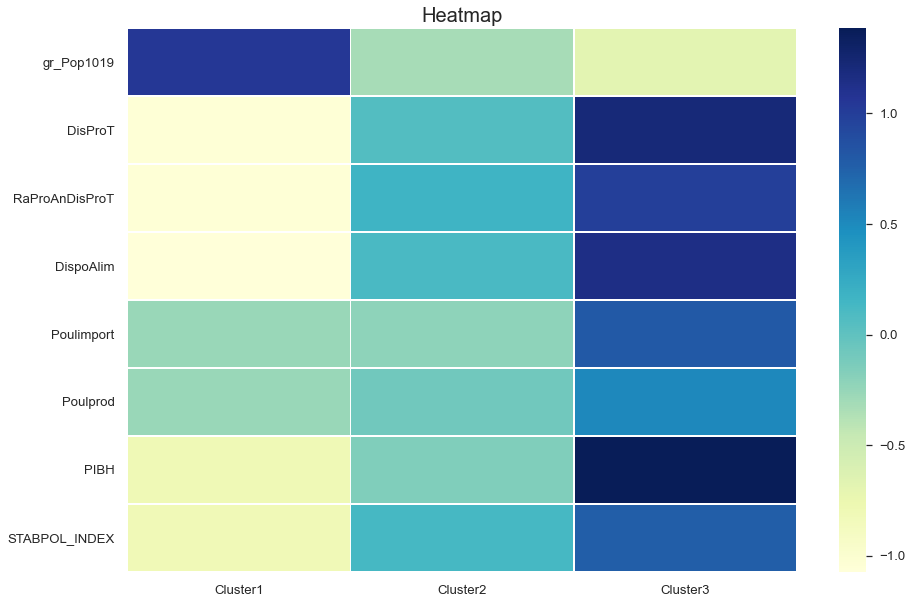

In [394]:
# Heatmap:Comparaison des clusters trouvés

# DataFrame de X_scaled, index, nombre des colonnes du fichiers chicken_food sans la colonne 'Cluster'.

scaled_df = pd.DataFrame(X_scaled, index=Pays, columns=features)

# La colonne 'Cluster' du fichier scaled_df est issues du nombre de clusters de KMEANS.

scaled_df['Cluster'] = cluster_cah3

# Transposée de la moyenne de la Fonction groupby du fichier scaled, sur la variable 'Cluster'.

heatmap_df=scaled_df.groupby("Cluster").mean().transpose()

# Renommer le fichier heatmap_df.

heatmap_df.columns = ['Cluster1', 'Cluster2', 'Cluster3']

sns.set(font_scale=1.2)

f, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Heatmap', fontsize=20)

ax = sns.heatmap(heatmap_df, linewidths=.5, cmap="YlGnBu")

plt.savefig('graph/14-Heatmap03.png')

plt.show()

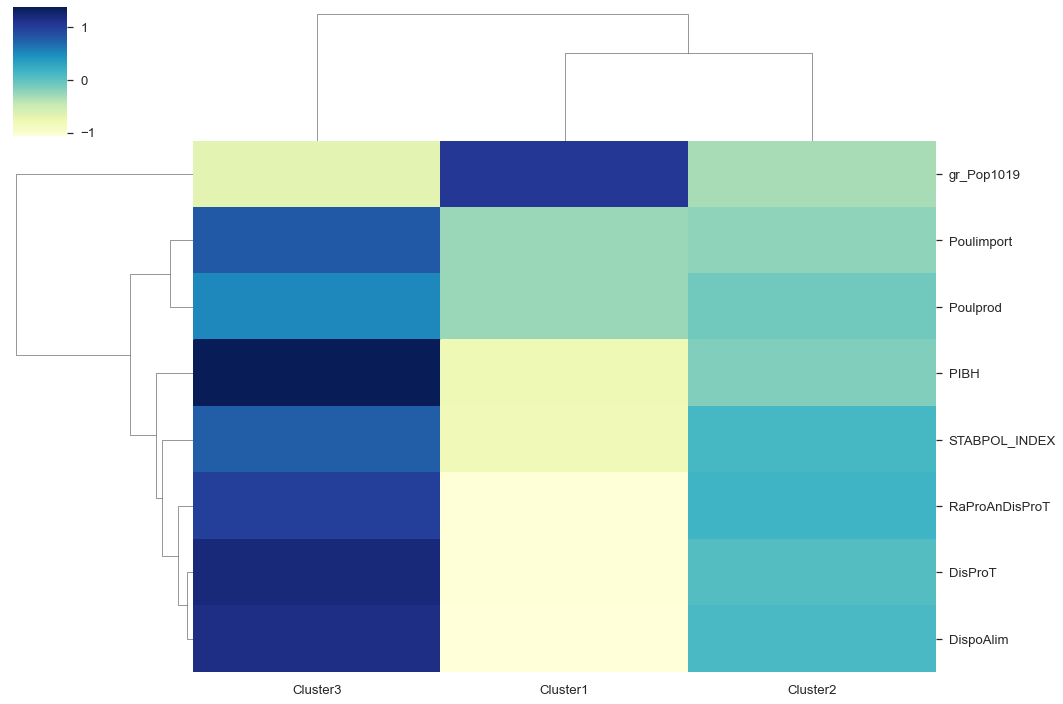

In [395]:
# Clustermap.

sns.clustermap(heatmap_df, cmap="YlGnBu", figsize=(15, 10))

plt.savefig('graph/YEBEL_SAMUEL_2_02_HEATMAP_032022.png')

plt.show()
#plt.savefig('graph/P9_02_heatmap.png', transparent=False, bbox_inches='tight')

In [396]:
# Création du dataframe d'appartenance des pays à chaque cluster.

cluster_cah3df = pd.DataFrame({'Pays':Pays, 'Cluster':cluster_cah3})

In [397]:
# II-4-2-3-14-1 Ajout de la colonne cluster au dataframe principal.

cluster_cah3df.set_index('Pays', inplace=True)

In [398]:
# II-4-2-3-14-2 Jointure du fichier cluster_cah3df au dataframe principal: data4_df.

data5_cah3_df = pd.merge(data4_df, cluster_cah3df, on = 'Pays')

# Visualisation du fichier data5_cah3_df.

data5_cah3_df

,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH,STABPOL_INDEX,Cluster
Pays,,,,,,,,,,
Afghanistan,38042000.0,2.99,57.31,0.18,2273,42875.0,28033,2065.0,-2.65,1
Albania,2881000.0,-0.26,116.02,0.54,3338,19304.0,11633,13671.5,0.12,3
Algeria,43053000.0,2.02,90.84,0.27,3493,0.0,260222,11510.6,-1.00,2
Angola,31825000.0,3.50,52.09,0.30,2445,253769.0,49002,6670.3,-0.31,1
Antigua and Barbuda,97000.0,1.09,80.80,0.64,2485,6010.0,16,21548.7,0.96,2
...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,32982000.0,1.63,100.37,0.43,3219,19716.0,64313,7014.3,-0.27,2
Vanuatu,300000.0,2.70,64.49,0.41,2605,3693.0,710,3117.7,1.03,2
Viet Nam,96462000.0,1.03,88.21,0.39,2939,204611.0,990379,8041.2,0.13,2


In [399]:
# II-4-2-3-14-3 Sauvegarde de la table des pays avec leurs clusters.

data5_cah3_df.to_csv('created_csv/table_pays_clusters_cah3.csv')

In [400]:
# II-4-2-3-14-4 Jointure des fichiers du clustering et cluster.

P9_data5f_cah3 = pd.merge(P9_data4f, cluster_cah3df, on = 'Pays')

# Visualisation du fichier P9_data5f_cah3.

P9_data5f_cah3

,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH,STABPOL_INDEX,Cluster
Pays,,,,,,,,,
Afghanistan,2.99,57.31,0.18,2273,42875.0,28033,2065.0,-2.65,1
Albania,-0.26,116.02,0.54,3338,19304.0,11633,13671.5,0.12,3
Algeria,2.02,90.84,0.27,3493,0.0,260222,11510.6,-1.00,2
Angola,3.50,52.09,0.30,2445,253769.0,49002,6670.3,-0.31,1
Antigua and Barbuda,1.09,80.80,0.64,2485,6010.0,16,21548.7,0.96,2
...,...,...,...,...,...,...,...,...,...
Uzbekistan,1.63,100.37,0.43,3219,19716.0,64313,7014.3,-0.27,2
Vanuatu,2.70,64.49,0.41,2605,3693.0,710,3117.7,1.03,2
Viet Nam,1.03,88.21,0.39,2939,204611.0,990379,8041.2,0.13,2


In [401]:
# II-4-2-3-14-5 Fichier des centroïdes.

P9_data6f_cah3 = P9_data5f_cah3.groupby('Cluster').mean()

# Visualisation du fichier P9_data6f_cah3.

round(P9_data6f_cah3,2)

,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH,STABPOL_INDEX
Cluster,,,,,,,,
1,2.63,60.36,0.26,2419.23,30992.72,96153.28,4022.39,-0.82
2,0.94,83.45,0.45,2950.50,38012.72,461611.99,17026.78,0.04
3,0.50,107.20,0.59,3413.25,184400.14,1683210.81,47969.45,0.61


In [402]:
# Calcul des centroides.

XC = P9_data6f_cah3.values

In [403]:
# Centrage et réduction.

XC_scaled = std_scaler.transform(XC)

len(XC), len(XC_scaled)

(3, 3)

In [404]:
# II-4-3 Analyse en Composantes Principales (ACP)

# Instanciation de la reduction de dimension: Calcul des composantes principales.

pca = decomposition.PCA(n_components=n_comp)

pca.fit(X_scaled)

PCA(n_components=8)

In [405]:
# Vérification des moyennes (aux erreurs de troncature près) et des écarts-type unitaires.

print(np.mean(X_scaled, axis=0), np.std(X_scaled, axis=0))

[ 4.96497253e-17  2.01357219e-16 -3.80647894e-16 -2.11011333e-16
  8.27495422e-18 -1.37915904e-17  6.61996338e-17 -3.03414988e-17] [1. 1. 1. 1. 1. 1. 1. 1.]


In [406]:
# Variance expliquée corrigée.

eigval= (n-1)/n*pca.explained_variance_

eigval

array([4.12448513, 1.14343242, 0.92951857, 0.60330733, 0.59900751,
       0.26497097, 0.24920877, 0.08606929])

In [407]:
# Proportion de variance expliquée.

prop_var = pca.explained_variance_ratio_ * 100

np.around(prop_var, 1)

array([51.6, 14.3, 11.6,  7.5,  7.5,  3.3,  3.1,  1.1])

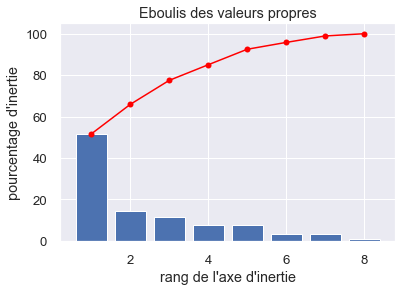

[51.6 14.3 11.6  7.5  7.5  3.3  3.1  1.1]


In [408]:
# Affichage des éboulis des valeurs propres.

display_scree_plot(pca)

print(np.around(prop_var, 1))

In [409]:
# Racine carrée des valeurs propres.

sqrt_eigval = np.sqrt(eigval)

In [410]:
# Corrélation des variables avec les axes
covar = np.zeros((p,p))
for k in range(p):
    covar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
    
mat_cor = pd.DataFrame(np.around(covar, 2),
                       index=features,
                       columns=['COR_'+str(i + 1) for i in range(p)])
mat_cor

,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6,COR_7,COR_8
gr_Pop1019,-0.68,0.22,-0.26,-0.13,0.61,-0.01,-0.17,-0.02
DisProT,0.90,0.04,0.07,-0.35,0.02,-0.04,-0.15,0.21
RaProAnDisProT,0.88,-0.12,0.00,0.18,-0.00,0.28,-0.30,-0.09
DispoAlim,0.87,0.13,0.09,-0.36,0.03,-0.22,0.02,-0.18
Poulimport,0.30,0.61,-0.67,0.15,-0.25,-0.08,-0.04,0.01
Poulprod,0.25,0.70,0.58,0.30,0.15,-0.03,0.01,0.02
PIBH,0.84,0.07,-0.22,-0.04,0.29,0.23,0.32,0.02
STABPOL_INDEX,0.68,-0.44,-0.14,0.43,0.24,-0.27,-0.00,0.03


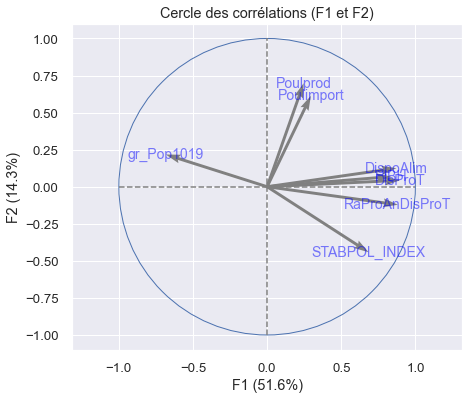

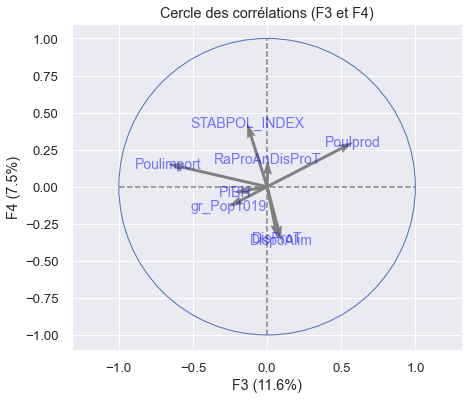

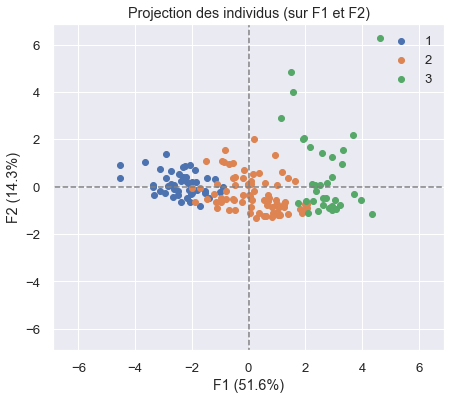

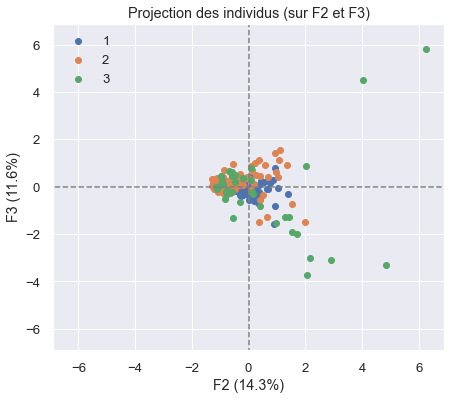

In [411]:
# Contribution des variables aux composantes principales.

pcs = pca.components_


display_circles(covar.T, n_comp, pca,
                [(0,1), (2,3)],
                labels = P9_data4f.columns)

# Calcul des coordonnées des individus sur le premier plan factoriel.

X_projected = pca.transform(X_scaled)

#Calcul des coordonnées des centroides sur le premier plan factoriel.

XC_projected = pca.transform(XC_scaled)

display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1),(1,2)],
                         labels=None,
                         alpha=1,
                         illustrative_var=cluster_cah3df.Cluster)

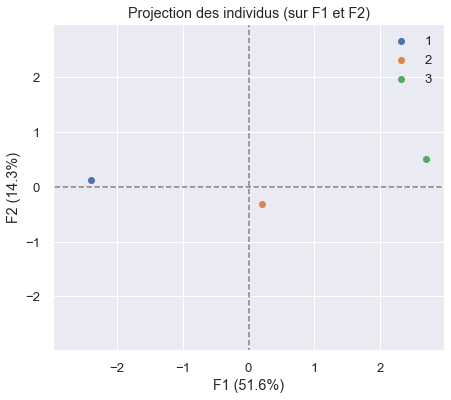

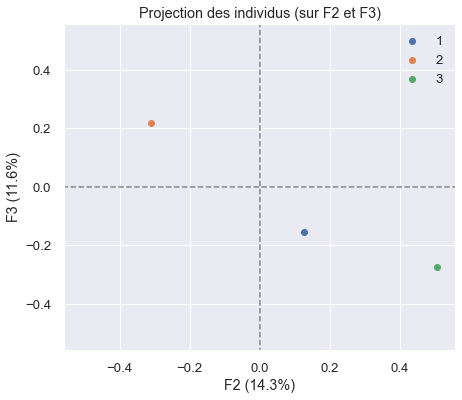

In [412]:
# Projection des Centroides sur le premier plan factoriel.

display_factorial_planes_centroid(XC_projected,
                         n_comp,
                         pca,
                         [(0,1),(1,2)],
                         labels=None,
                         alpha=1,
                         illustrative_var=P9_data6f_cah3.index)

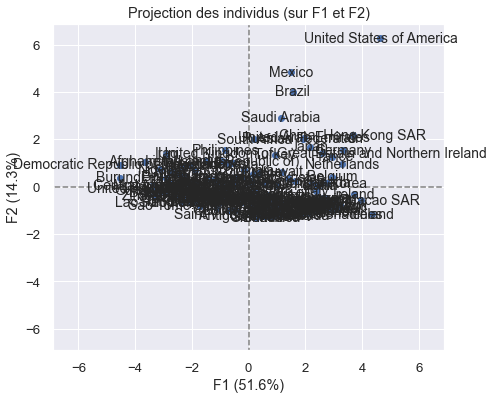

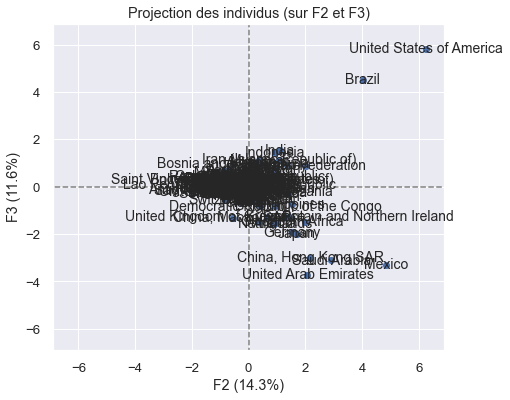

In [413]:
# Projection des individus (Pays) sur le premier plan factoriel.

# plt.figure(figsize=(20,15)) 

display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1),(1,2)],
                         labels=Pays,
                         alpha=1)

In [414]:
# Calcul des coordonnées des centroides.

coord_centroid_cah3 = pd.DataFrame(np.around(XC_projected, 2),
                              index=P9_data6f_cah3.index,
                              columns=['Coord_F' + str(i + 1) for i in range(p)])

# Sauvegarde de la table des centroides avec leurs coordonnées dans chaque dimension.

coord_centroid_cah3.to_csv('created_csv/coord_centroid_cah3.csv')

coord_centroid_cah3

,Coord_F1,Coord_F2,Coord_F3,Coord_F4,Coord_F5,Coord_F6,Coord_F7,Coord_F8
Cluster,,,,,,,,
1,-2.41,0.13,-0.16,-0.01,0.24,0.08,0.02,0.03
2,0.20,-0.31,0.22,0.02,-0.21,-0.06,-0.09,-0.06
3,2.70,0.51,-0.27,-0.03,0.14,0.02,0.16,0.09


In [415]:
# Liste principale des pays potentiels.

P9_data7_cah3 = data5_cah3_df[data5_cah3_df['Cluster'] == 3]

selection = P9_data7_cah3.index

P9_data7_cah3

,pop2019,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH,STABPOL_INDEX,Cluster
Pays,,,,,,,,,,
Albania,2881000.0,-0.26,116.02,0.54,3338,19304.0,11633,13671.5,0.12,3
Australia,25203000.0,1.44,107.94,0.68,3417,1862.0,1240214,49455.5,1.09,3
Austria,8955000.0,0.70,108.95,0.59,3691,49650.0,115510,55833.3,0.98,3
Belgium,11539000.0,0.59,100.34,0.60,3800,219623.0,440460,51742.7,0.48,3
Brazil,211050000.0,0.84,93.81,0.58,3246,5030.0,13516525,14763.9,-0.55,3
Canada,37411000.0,1.02,108.55,0.56,3539,137843.0,1330843,49006.7,1.03,3
"China, Hong Kong SAR",7436000.0,0.73,129.45,0.75,3236,645184.0,23281,59586.2,-0.27,3
"China, Macao SAR",640000.0,1.95,107.31,0.64,3312,18302.0,3299,127162.0,1.25,3
Denmark,5772000.0,0.43,115.38,0.66,3421,37402.0,156900,57678.1,1.01,3


In [416]:
# Contribution des individus dans l'inertie total.

di = np.sum(X_scaled**2, axis=1)
ctr_tot = pd.DataFrame({'ID':Pays, 'd_i': np.around(di, 2)})

ctr_tot.describe()

,d_i
count,161.000000
mean,7.999627
std,10.459352
min,0.570000
25%,3.280000
50%,5.450000
75%,9.180000
max,107.490000


In [417]:
# Contribution des individus de la selection 1 dans l'inertie total.

ctr_tot['Selection'] = ctr_tot['ID'].isin(selection)

ctr_tot[ctr_tot['Selection'] == True].sort_values(by='d_i').head()

,ID,d_i,Selection
117,Republic of Korea,5.25,True
1,Albania,6.25,True
72,Italy,6.29,True
115,Poland,6.43,True
96,Montenegro,6.58,True


In [418]:
# Qualité de représentation des individus.

cos2 = X_projected**2

for j in range(p):
    cos2[:,j] = 100 * cos2[:,j]/di

qual_repr = pd.DataFrame(np.around(cos2, 1),
                         index=Pays,
                         columns=['COS2_' + str(i + 1) for i in range(p)])

qual_repr = qual_repr.reset_index()

qual_repr.head()

,Pays,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6,COS2_7,COS2_8
0,Afghanistan,80.3,6.7,0.0,6.8,0.3,5.7,0.2,0.0
1,Albania,49.0,7.3,7.2,11.7,14.5,1.9,6.0,2.4
2,Algeria,4.6,3.3,4.6,71.8,0.4,11.4,0.1,3.7
3,Angola,53.9,8.6,26.8,5.0,2.9,0.8,1.0,1.0
4,Antigua and Barbuda,6.7,35.2,0.2,35.1,1.7,9.4,10.5,1.2


In [419]:
# Vérification des cos.

np.sum(cos2, axis=1)

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 10

In [420]:
# Contribution des individus aux axes.

ctr = X_projected**2

for j in range(p):
    ctr[:,j] = 100 * ctr[:,j]/(n*eigval[j])

ctr_ax = pd.DataFrame(np.around(ctr, 2),
                     index=Pays,
                     columns=['CTR_' + str(i + 1) for i in range(p)])

ctr_ax = ctr_ax.reset_index()

ctr_ax.describe()

,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6,CTR_7,CTR_8
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,0.621304,0.620870,0.621056,0.620994,0.620932,0.621118,0.620994,0.620745
std,0.663301,2.090435,2.356002,1.009806,1.297712,1.202960,1.266407,0.948011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.050000,0.010000,0.040000,0.030000,0.060000,0.060000,0.040000
50%,0.450000,0.190000,0.060000,0.220000,0.190000,0.210000,0.240000,0.210000
75%,0.940000,0.490000,0.240000,0.760000,0.660000,0.630000,0.790000,0.680000
max,3.250000,21.270000,22.660000,6.770000,9.310000,8.870000,11.710000,4.500000


In [421]:
# Contribution des individus de la selection 1 aux axes.

ctr_ax['Selection'] = ctr_ax['Pays'].isin(selection)

ctr_ax[ctr_ax['Selection'] == True]

,Pays,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6,CTR_7,CTR_8,Selection
1,Albania,0.46,0.25,0.30,0.76,0.94,0.27,0.93,1.09,True
7,Australia,1.11,0.13,0.02,0.01,1.76,0.18,0.25,0.10,True
8,Austria,1.38,0.18,0.03,0.45,0.54,0.02,0.42,0.53,True
14,Belgium,1.29,0.09,0.42,0.31,0.00,0.03,0.25,4.06,True
20,Brazil,0.37,8.77,13.59,3.25,0.69,0.00,0.74,0.00,True
27,Canada,1.14,0.01,0.07,0.03,0.54,0.31,0.07,0.00,True
31,"China, Hong Kong SAR",2.03,2.57,5.98,0.14,0.99,2.32,1.49,3.93,True
32,"China, Macao SAR",2.35,0.17,1.13,0.18,9.31,8.57,11.71,0.43,True
41,Denmark,1.55,0.32,0.01,0.14,0.38,0.42,0.07,0.31,True
50,Finland,1.20,0.44,0.01,0.21,0.18,0.17,0.00,1.52,True


In [422]:
# Vérification du calcul de la contribution aux axes.

np.sum(ctr_ax,axis=0)

Pays         AfghanistanAlbaniaAlgeriaAngolaAntigua and Bar...
CTR_1                                                   100.03
CTR_2                                                    99.96
CTR_3                                                    99.99
CTR_4                                                    99.98
CTR_5                                                    99.97
CTR_6                                                    100.0
CTR_7                                                    99.98
CTR_8                                                    99.94
Selection                                                   36
dtype: object

In [423]:
# DataFrame des Pays du cluster 3 (Potentiels Pays) et leur index.

P9_data7a_cah3_df = pd.DataFrame(P9_data7_cah3, index = P9_data7_cah3.index)

# Pays du cluster 3 ayant une évolution de la population négative.

Pays_gr_Pop1019 = P9_data7a_cah3_df[P9_data7a_cah3_df['gr_Pop1019']<0].index

# Fichier des pays du cluster 3 sans pays ayant une évolution de la population négative.

P9_data7b_cah3_df = P9_data7a_cah3_df.drop(Pays_gr_Pop1019)

In [424]:
# DataFrame des Pays du cluster 3 et leur index.

P9_data7b_cah3_df = pd.DataFrame(P9_data7b_cah3_df, index = P9_data7b_cah3_df.index)

# Pays du cluster 3 ayant une stabilité politique très préoccupante.

Pays_STABPOL_INDEX = P9_data7b_cah3_df[P9_data7b_cah3_df['STABPOL_INDEX']<0].index

# Fichier des pays du cluster 3 sans une stabilité politique très préoccupante.

P9_data7c_cah3_df = P9_data7b_cah3_df.drop(Pays_STABPOL_INDEX)

In [425]:
# Dégré d'ouverture de l'économie.

P9_data7c_cah3_df['Open_Index'] = P9_data7c_cah3_df['Poulimport']/P9_data7c_cah3_df['Poulprod']

# Réorganisation du fichier du cluster 3.

P9_data8_cah3_df = P9_data7c_cah3_df[['gr_Pop1019','DisProT','RaProAnDisProT','DispoAlim','Open_Index','PIBH','STABPOL_INDEX','Cluster']]

In [426]:
# DataFrame des Pays du cluster 3 et leur index.

P9_data8a_cah3_df = pd.DataFrame(P9_data8_cah3_df, index = P9_data8_cah3_df.index)

In [427]:
# Pays du cluster 3 ayant un dégré d'ouverture de l'économie non acceptable.

Pays_Open_Index = P9_data8a_cah3_df[P9_data8a_cah3_df['Open_Index']<0.3].index

In [428]:
# Fichier des pays du cluster 3 avec un dégré d'ouverture de l'économie acceptable.

P9_data8b_cah3_df = P9_data8a_cah3_df.drop(Pays_Open_Index)

In [429]:
# Pays du cluster 3 avec une disponibilité alimentaire supérieure à 3000 Kcal/personne/jour et 
# un PIBH supérieur a 30 000 dollars.

P9_data8c_cah3_df = P9_data8b_cah3_df[(P9_data8b_cah3_df.DispoAlim>3000)&(P9_data8b_cah3_df.PIBH>30000)]

P9_data8c_cah3_df

,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Open_Index,PIBH,STABPOL_INDEX,Cluster
Pays,,,,,,,,
Austria,0.70,108.95,0.59,3691,0.429833,55833.3,0.98,3
Belgium,0.59,100.34,0.60,3800,0.498622,51742.7,0.48,3
"China, Macao SAR",1.95,107.31,0.64,3312,5.547742,127162.0,1.25,3
France,0.33,109.73,0.59,3532,0.345211,45834.2,0.31,3
Germany,0.07,104.24,0.60,3559,0.479832,53639.3,0.58,3
Ireland,0.99,111.05,0.57,3811,0.434014,87786.2,0.97,3
Malta,0.39,105.36,0.58,3379,1.415789,43950.6,1.09,3
Netherlands,0.32,108.11,0.64,3353,0.374390,56629.1,0.86,3
Sweden,0.75,108.10,0.64,3184,0.343139,52531.2,1.05,3


In [430]:
# Détecter les Pays hors Union Européenne plus la France.

P9_data9_cah3_df = P9_data8c_cah3_df.iloc[[2,3,9,10]]

In [431]:
# Supprimer tous les pays hors Union Européenne plus la France. 

P9_data10_cah3_df = P9_data8c_cah3_df.drop(P9_data8c_cah3_df.index[[2,3,9,10]])

In [432]:
# Top 7 des pays potentiels.

P9_data10_cah3_df

,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Open_Index,PIBH,STABPOL_INDEX,Cluster
Pays,,,,,,,,
Austria,0.70,108.95,0.59,3691,0.429833,55833.3,0.98,3
Belgium,0.59,100.34,0.60,3800,0.498622,51742.7,0.48,3
Germany,0.07,104.24,0.60,3559,0.479832,53639.3,0.58,3
Ireland,0.99,111.05,0.57,3811,0.434014,87786.2,0.97,3
Malta,0.39,105.36,0.58,3379,1.415789,43950.6,1.09,3
Netherlands,0.32,108.11,0.64,3353,0.374390,56629.1,0.86,3
Sweden,0.75,108.10,0.64,3184,0.343139,52531.2,1.05,3


In [433]:
# IV. Tests Statistiques.

# IV.1. Test de normalité des variables: Shapiro.

# Rerenons le DataFrame P9_data5f_cah2, et effectuons le test de Shapiro sur chacune de ces  
# variables, afin de repérer lesquelles suivent une loi normale au seuil de 1%.

P9_data5f_cah3

,gr_Pop1019,DisProT,RaProAnDisProT,DispoAlim,Poulimport,Poulprod,PIBH,STABPOL_INDEX,Cluster
Pays,,,,,,,,,
Afghanistan,2.99,57.31,0.18,2273,42875.0,28033,2065.0,-2.65,1
Albania,-0.26,116.02,0.54,3338,19304.0,11633,13671.5,0.12,3
Algeria,2.02,90.84,0.27,3493,0.0,260222,11510.6,-1.00,2
Angola,3.50,52.09,0.30,2445,253769.0,49002,6670.3,-0.31,1
Antigua and Barbuda,1.09,80.80,0.64,2485,6010.0,16,21548.7,0.96,2
...,...,...,...,...,...,...,...,...,...
Uzbekistan,1.63,100.37,0.43,3219,19716.0,64313,7014.3,-0.27,2
Vanuatu,2.70,64.49,0.41,2605,3693.0,710,3117.7,1.03,2
Viet Nam,1.03,88.21,0.39,2939,204611.0,990379,8041.2,0.13,2


In [434]:
# Pour chaque variable X de P9_data5f_cah3, posons l'hypothèse nulle H0(X): 
# La variable X suit une loi normale de moyenne mean(X) et de variance Var(X). 
# Le test de Shapiro ci-dessous nous indiquera s'il faut rejeter H0(X) au seuil de 5%.

#Juste pour faire joli...

print("________________________________________________________________________________") 

shapi = P9_data5f_cah3.drop(columns = ["Cluster"])

# Arrondissons les valeurs du test pour une meilleure visibilité.

for X in shapi:
    ech = stats.shapiro(shapi[X]) 
    print(X, "--->", "statistique de test:", round(ech[0], 3), "and", "pvalue=", round(ech[1], 3))
    print("________________________________________________________________________________")

________________________________________________________________________________
gr_Pop1019 ---> statistique de test: 0.984 and pvalue= 0.062
________________________________________________________________________________
DisProT ---> statistique de test: 0.992 and pvalue= 0.553
________________________________________________________________________________
RaProAnDisProT ---> statistique de test: 0.961 and pvalue= 0.0
________________________________________________________________________________
DispoAlim ---> statistique de test: 0.988 and pvalue= 0.199
________________________________________________________________________________
Poulimport ---> statistique de test: 0.509 and pvalue= 0.0
________________________________________________________________________________
Poulprod ---> statistique de test: 0.299 and pvalue= 0.0
________________________________________________________________________________
PIBH ---> statistique de test: 0.824 and pvalue= 0.0
______________________

In [435]:
# D'après le test de Shapiro, l'évolution de la population (gr_Pop1019), la disponibilité totale 
# des protéines (DisproT) et la disponibilité alimentaire (DispoAlim) ont respectivement 
# des pvalues (0.062, 0.553 et 0.199) > 5%. Ceci signifie qu'on ne peut pas rejeter H0 au seuil de
# 5%. Nous pouvons donc considérer que ces trois variables que suivent une loi gaussienne, et 
# nous la choissirons pour effectuer un test de comparaison entre les groupes 1 et 2 
# issus de notre clustering. 

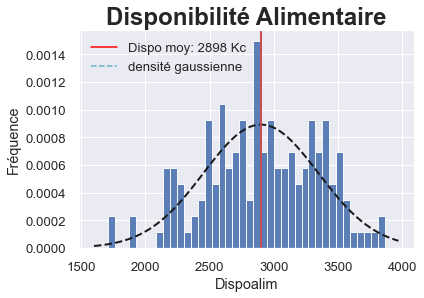

In [439]:
# Représentation de la distribution marginale de la variable Disponibilité Alimentaire.

dispoalim = P9_data5f_cah3['DispoAlim']

# Ajuster une distribution normale aux données : moyenne et écart type.

mu, std = norm.fit(dispoalim)

xbar=numpy.mean(dispoalim)

round(xbar,2)

# REPREDENTATION GRAPHIQUE.

plt.hist(dispoalim, density=True, bins=40, alpha=0.9, color='b')

# Plot the PDF.

xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k--', linewidth=2)

plt.grid(True)

plt.title('Disponibilité Alimentaire', fontsize= 24, fontweight="bold")

plt.axvline(xbar, color='r', linewidth=2)

plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Dispo moy: 2898 Kc"),
                    mlines.Line2D([], [], linestyle='--',color='c',markersize=15, label="densité gaussienne")])

plt.xlabel('Dispoalim')

plt.ylabel('Fréquence')

plt.savefig('graph/DispoAlim.png')

plt.show()

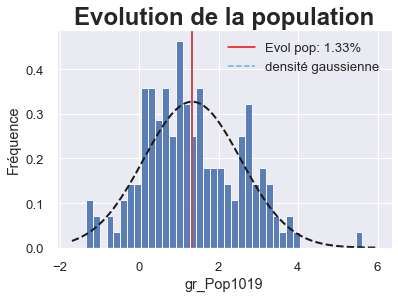

In [440]:
# Représentation de la distribution marginale de la variable Evolution de la Population.

gr_Pop1019 = P9_data5f_cah3['gr_Pop1019']

# Ajuster une distribution normale aux données : moyenne et écart type.

mu1, std1 = norm.fit(gr_Pop1019)

xbar1=numpy.mean(gr_Pop1019)

round(xbar1,2)

# REPREDENTATION GRAPHIQUE.

plt.hist(gr_Pop1019, density=True, bins=40, alpha=0.9, color='b')

# Plot the PDF.

xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)

p1 = norm.pdf(x, mu1, std1)

plt.plot(x, p1, 'k--', linewidth=2)

plt.grid(True)

plt.title('Evolution de la population', fontsize= 24, fontweight="bold")

plt.axvline(xbar1, color='r', linewidth=2)

plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Evol pop: 1.33%"),
                    mlines.Line2D([], [], linestyle='--',color='c',markersize=15, label="densité gaussienne")])

plt.xlabel('gr_Pop1019')

plt.ylabel('Fréquence')

plt.savefig('graph/gr_Pop1019.png')

plt.show()

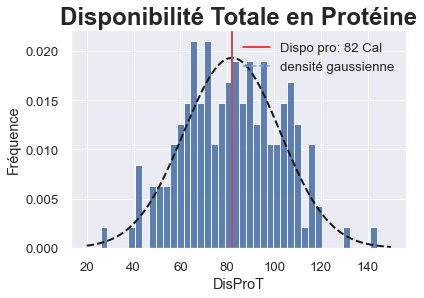

In [441]:
# Représentation de la distribution marginale de la variable Disponibilité Totale en Protéines.

DisProT    =  P9_data5f_cah3['DisProT']

# Ajuster une distribution normale aux données : moyenne et écart type.

mu2, std2 = norm.fit(DisProT)

xbar2=numpy.mean(DisProT)

round(xbar2,2)

# REPREDENTATION GRAPHIQUE.

plt.hist(DisProT, density=True, bins=40, alpha=0.9, color='b')

# Plot the PDF.

xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)

p2 = norm.pdf(x, mu2, std2)

plt.plot(x, p2, 'k--', linewidth=2)

plt.grid(True)

plt.title('Disponibilité Totale en Protéine', fontsize= 24, fontweight="bold")

plt.axvline(xbar2, color='r', linewidth=2)

plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Dispo pro: 82 Cal"),
                    mlines.Line2D([], [], linestyle='--',color='c',markersize=15, label="densité gaussienne")])

plt.xlabel('DisProT')

plt.ylabel('Fréquence')

plt.savefig('graph/DisProT.png')

plt.show()

In [162]:
# IV.2. Test de comparaison.

# Nous réalisons un test statistique afin de vérifier si la moyenne et la variance des groupes 
# 2 et 3 diffèrent respectivement et de façon significative au seuil de 5%, 
# sur les variables: gr_Pop1019, DisproT et DispoAlim.

# Soient μ2 et μ5, les moyennes respectives des groupes 2 et 3 et de chacune des trois variables. 
# Soient σ2² et σ5², les variances respectives des groupes 2 et 3 de chacune des trois variables.

# Hypothèses de test sur les moyennes:

#           H0: μ1 = μ2  

#           H1: μ1 ≠ μ2 

# Hypohèses de test sur les variances:

#           K0: σ1² = σ2²

#           K1: σ1² ≠ σ2²

In [166]:
g1=P9_data5f_cah3[P9_data5f_cah3["Cluster"]==1]["gr_Pop1019"]
g2=P9_data5f_cah3[P9_data5f_cah3["Cluster"]==3]["gr_Pop1019"]

comparaison_variances=stats.bartlett(g1, g2)
print("Test de comparaison des variances:")
print("statistc =", round(comparaison_variances[0], 2))
print("pvalue =", round(comparaison_variances[1], 3))

print("______________________________")
print("______________________________")

comparaison_moyennes=stats.ttest_ind(g1, g2, equal_var=True)
print("Test de comparaison des moyennes:")
print("statistc =", round(comparaison_moyennes[0], 2))
print("pvalue =", round(comparaison_moyennes[1], 3))

Test de comparaison des variances:
statistc = 1.22
pvalue = 0.27
______________________________
______________________________
Test de comparaison des moyennes:
statistc = 13.46
pvalue = 0.0


In [167]:
g1=P9_data5f_cah3[P9_data5f_cah3["Cluster"]==1]["DisProT"]
g2=P9_data5f_cah3[P9_data5f_cah3["Cluster"]==3]["DisProT"]

comparaison_variances=stats.bartlett(g1, g2)
print("Test de comparaison des variances:")
print("statistc =", round(comparaison_variances[0], 2))
print("pvalue =", round(comparaison_variances[1], 3))

print("______________________________")
print("______________________________")

comparaison_moyennes=stats.ttest_ind(g1, g2, equal_var=True)
print("Test de comparaison des moyennes:")
print("statistc =", round(comparaison_moyennes[0], 2))
print("pvalue =", round(comparaison_moyennes[1], 3))

Test de comparaison des variances:
statistc = 0.23
pvalue = 0.633
______________________________
______________________________
Test de comparaison des moyennes:
statistc = -17.52
pvalue = 0.0


In [168]:
g1=P9_data5f_cah3[P9_data5f_cah3["Cluster"]==1]["DispoAlim"]

g2=P9_data5f_cah3[P9_data5f_cah3["Cluster"]==3]["DispoAlim"]

comparaison_variances=stats.bartlett(g1, g2)
print("Test de comparaison des variances:")
print("statistc =", round(comparaison_variances[0], 2))
print("pvalue =", round(comparaison_variances[1], 3))

print("______________________________")
print("______________________________")

comparaison_moyennes=stats.ttest_ind(g1, g2, equal_var=True)
print("Test de comparaison des moyennes:")
print("statistc =", round(comparaison_moyennes[0], 2))
print("pvalue =", round(comparaison_moyennes[1], 3))

Test de comparaison des variances:
statistc = 3.62
pvalue = 0.057
______________________________
______________________________
Test de comparaison des moyennes:
statistc = -16.99
pvalue = 0.0


In [ ]:
# Au seuil de 5%, nous rejetons H0 pour les trois variables.
# Mais nous ne pouvons pas rejeter K0 au seuil de 5% pour les trois variables.
# Bien que les groupes soient distincts, la variance des trois variables est statistiquement.
# égale dans les trois groupes. 